In [1]:
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
# import pandas as pd
# pd.options.display.float_format = '{:.2f}'.format

In [367]:
import pandas as pd
import math
import seaborn as sns
from matplotlib import pyplot as plt
import re
import numpy as np
import geopandas as gpd
from shapely.geometry import Point # Point class
from shapely.geometry import shape
import io
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")
from geopy.geocoders import Nominatim
from time import sleep
from datetime import datetime

In [368]:
# read the daily Volume
doh_weekday_factor=pd.read_csv('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Processed Data/four_year_ave_HOD_weekday.csv')
doh_weekend_factor=pd.read_csv('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Processed Data/four_year_ave_HOD_weekend.csv')

In [369]:
doh_weekday_factor.columns

Index(['Unnamed: 0', 'ID', 'starttime', 'Average_Yearly_HOD_Factor'], dtype='object')

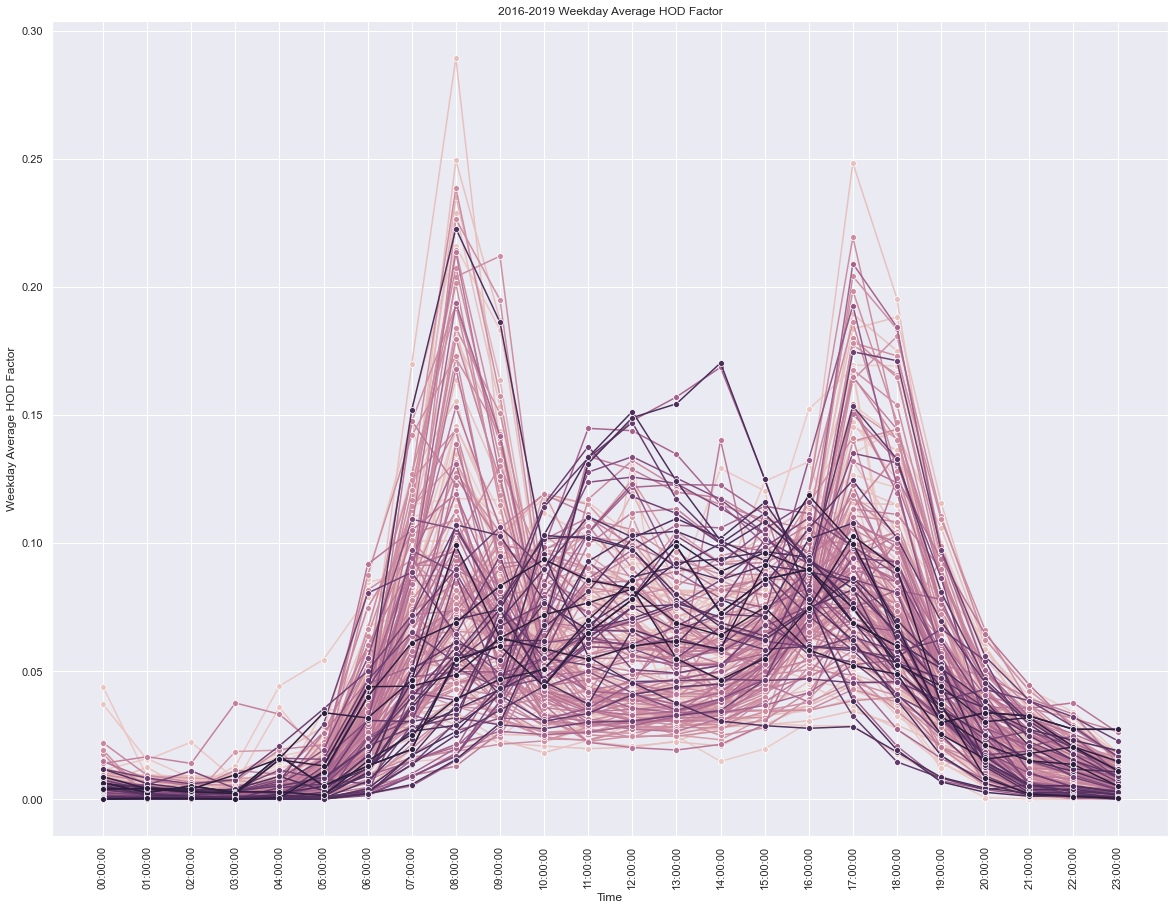

In [370]:
# Combined all 4 years together
import seaborn as sns
sns.set(font_scale=2.0)
sns.set(rc={'figure.figsize':(20,15)})

#fig, ax = plt.subplots(2,2)

ax=sns.lineplot(x=doh_weekday_factor['starttime'],y=doh_weekday_factor['Average_Yearly_HOD_Factor'],hue=doh_weekday_factor['ID'],
                   markers=True,marker="o", dashes=False,sort=True) 
plt.xticks(rotation = 'vertical')
ax.get_legend().remove()
ax.title.set_text('2016-2019 Weekday Average HOD Factor')
ax.set_ylabel('Weekday Average HOD Factor' )
ax.set_xlabel('Time')
plt.show()

In [371]:
# read the indices
ind=pd.read_csv('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Processed Data/Updated_indices.csv')
ind.head()

Unnamed: 0.1    ID  year   Max_WWI  Average_WWI  Weekday_Aergage_AMI  \
0             0   671  2016  2.232143     0.769600             0.703185   
1             1   671  2017  2.893617     0.776723             0.743791   
2             2   671  2018  1.352564     0.710009             0.863646   
3             3   671  2019  1.435644     0.660785             0.820369   
4             4  1127  2016  2.222222     0.257277             2.050485   

   Weekend_Aergage_AMI  Average AMI_wday_wend  Max_weekend_AMI  \
0             0.324525               2.166812         0.360694   
1             0.376689               1.974549         0.437975   
2             0.291176               2.966061         0.295405   
3             0.340759               2.407476         0.354620   
4             0.584499               3.508108         0.736655   

   Max_weekday_AMI  ...       state        country  Unnamed: 0      edgeUID  \
0         0.930693  ...  California  United States           0  308723101.0   
1         1.020619  ...  California  United States           0  308723101.0   
2         1.433566  ...  California  United States           0  308723101.0   
3         1.210702  ...  California  United States           0  308723101.0   
4         2.235149  ...  California  United States           1  308779961.0   

         osmId  stv_total  stv_com_total stv_rec_total  stv_com_ratio  \
0  215845474.0        NaN            NaN           NaN            NaN   
1  215845474.0        NaN            NaN           NaN            NaN   
2  215845474.0     4890.0          260.0        4630.0       0.053170   
3  215845474.0     4625.0          255.0        4370.0       0.055135   
4   87297166.0        NaN            NaN           NaN            NaN   

  stv_rec_ratio  
0           NaN  
1           NaN  
2      0.946830  
3      0.944865  
4           NaN  

[5 rows x 40 columns]

In [372]:
ind.shape

(588, 40)

# Separate weekday Pattern using Max weekday AMI_PMI Value threshold

In [373]:
ind['county'].unique()

array([nan, 'Orange County', 'Alameda County', 'San Diego County',
       'CAL Fire San Diego Unit', 'Marin County', 'San Mateo County',
       'Contra Costa County', 'El Dorado County', 'Douglas County',
       'Placer County', 'Washoe County', 'Humboldt County',
       'San Luis Obispo County'], dtype=object)

In [374]:
# exclude El darado county
ind1=ind.loc[ind['county']!='El Dorado County']
ind2=ind1.loc[ind['county']!='Douglas County']
ind3=ind2.loc[ind['county']!='Placer County']

In [375]:
ind.columns

Index(['Unnamed: 0.1', 'ID', 'year', 'Max_WWI', 'Average_WWI',
       'Weekday_Aergage_AMI', 'Weekend_Aergage_AMI', 'Average AMI_wday_wend',
       'Max_weekend_AMI', 'Max_weekday_AMI', 'Daily_Max_AMI', 'Daily_Max_PMI',
       'Weekday_Aergage_PMI', 'Weekend_Aergage_PMI', 'Average PMI_wday_wend',
       'Max_weekday_PMI', 'Max_weekend_PMI', 'max_daily_am_pm',
       'max_daily_am_pm_value', 'max_weekend_am_pm', 'max_weekend_am_pm_Value',
       'max_weekday_am_pm', 'max_weekday_am_pm_value', 'seasonal_factor',
       'latitude', 'longitude', 'location', 'road', 'city', 'county', 'state',
       'country', 'Unnamed: 0', 'edgeUID', 'osmId', 'stv_total',
       'stv_com_total', 'stv_rec_total', 'stv_com_ratio', 'stv_rec_ratio'],
      dtype='object')

In [376]:
doh_weekday_factor.columns

Index(['Unnamed: 0', 'ID', 'starttime', 'Average_Yearly_HOD_Factor'], dtype='object')

In [377]:
max_ami_pmi=pd.DataFrame({'Average_max_ami_pmi':ind.groupby(['ID'])['max_weekday_am_pm_value'].mean()}).reset_index()
max_ami_pmi.shape

(180, 2)

In [378]:
max_ami_pmi['Average_max_ami_pmi'].describe()

count    179.000000
mean       3.043078
std        2.379423
min        0.298198
25%        1.280559
50%        2.057999
75%        4.364086
max       15.119351
Name: Average_max_ami_pmi, dtype: float64

In [379]:
doh_weekday_factor.shape

(5160, 4)

In [380]:
weekday_data=pd.merge(doh_weekday_factor,max_ami_pmi, left_on=['ID'],right_on=['ID'],how='inner')
weekday_data.columns

Index(['Unnamed: 0', 'ID', 'starttime', 'Average_Yearly_HOD_Factor',
       'Average_max_ami_pmi'],
      dtype='object')

In [381]:
def plot (weekday_data):
    import seaborn as sns
    sns.set(rc={'figure.figsize':(20,15)})
    sns.set(font_scale=2.0)



    #fig, ax = plt.subplots(2,2)

    ax=sns.lineplot(x=weekday_data['starttime'],y=weekday_data['Average_Yearly_HOD_Factor'],hue=weekday_data['ID'],
                       markers=True,marker="o", dashes=False,sort=True) 
    plt.xticks(rotation = 'vertical')
    ax.set(ylim=(0, 0.30))
    ax.get_legend().remove()
    ax.title.set_text('2016-2019 Weekday Average HOD Factor')
    ax.set_ylabel('Weekday Average HOD Factor' )
    ax.set_xlabel('Time')
    plt.show()

In [382]:
def plot_ave (d1_ave):
    import seaborn as sns
    sns.set(rc={'figure.figsize':(20,15)})
    sns.set(font_scale=2.0)



    #fig, ax = plt.subplots(2,2)

    ax=sns.lineplot(x=d1_ave['starttime'],y=d1_ave['Average_Group_HOD_Factor'],
                       markers=True,marker="o", dashes=False, sort=True) 
    plt.xticks(rotation = 'vertical')
    ax.set(ylim=(0, 0.30))
    ax.title.set_text('2016-2019 Weekday Average HOD Factor')
    ax.set_ylabel('Weekday Average HOD Factor' )
    ax.set_xlabel('Time')
    plt.show()

In [383]:
from pandas.api.types import CategoricalDtype
cats = [ '0:00:00','1:00:00','2:00:00','3:00:00','4:00:00','5:00:00','6:00:00','7:00:00','8:00:00','9:00:00','10:00:00','11:00:00','12:00:00','13:00:00','14:00:00','15:00:00','16:00:00','17:00:00','18:00:00','19:00:00','20:00:00','21:00:00','22:00:00','23:00:00']
cat_type = CategoricalDtype(categories=cats, ordered=True)


In [384]:
d1=weekday_data.loc[weekday_data['Average_max_ami_pmi']<=1.0]
d1_ave=pd.DataFrame({'Average_Group_HOD_Factor':d1.groupby(['starttime'])['Average_Yearly_HOD_Factor'].mean()}).reset_index()
d2=weekday_data[(weekday_data.Average_max_ami_pmi>1)& (weekday_data.Average_max_ami_pmi<=2.5) ]
d2_ave=pd.DataFrame({'Average_Group_HOD_Factor':d2.groupby(['starttime'])['Average_Yearly_HOD_Factor'].mean()}).reset_index()
#d3=weekend_data[(weekend_data.Average_max_ami_pmi>2.5)& (weekend_data.Average_max_ami_pmi<=3.5) ]
d3=weekday_data.loc[weekday_data['Average_max_ami_pmi']>2.5]
d3_ave=pd.DataFrame({'Average_Group_HOD_Factor':d3.groupby(['starttime'])['Average_Yearly_HOD_Factor'].mean()}).reset_index()

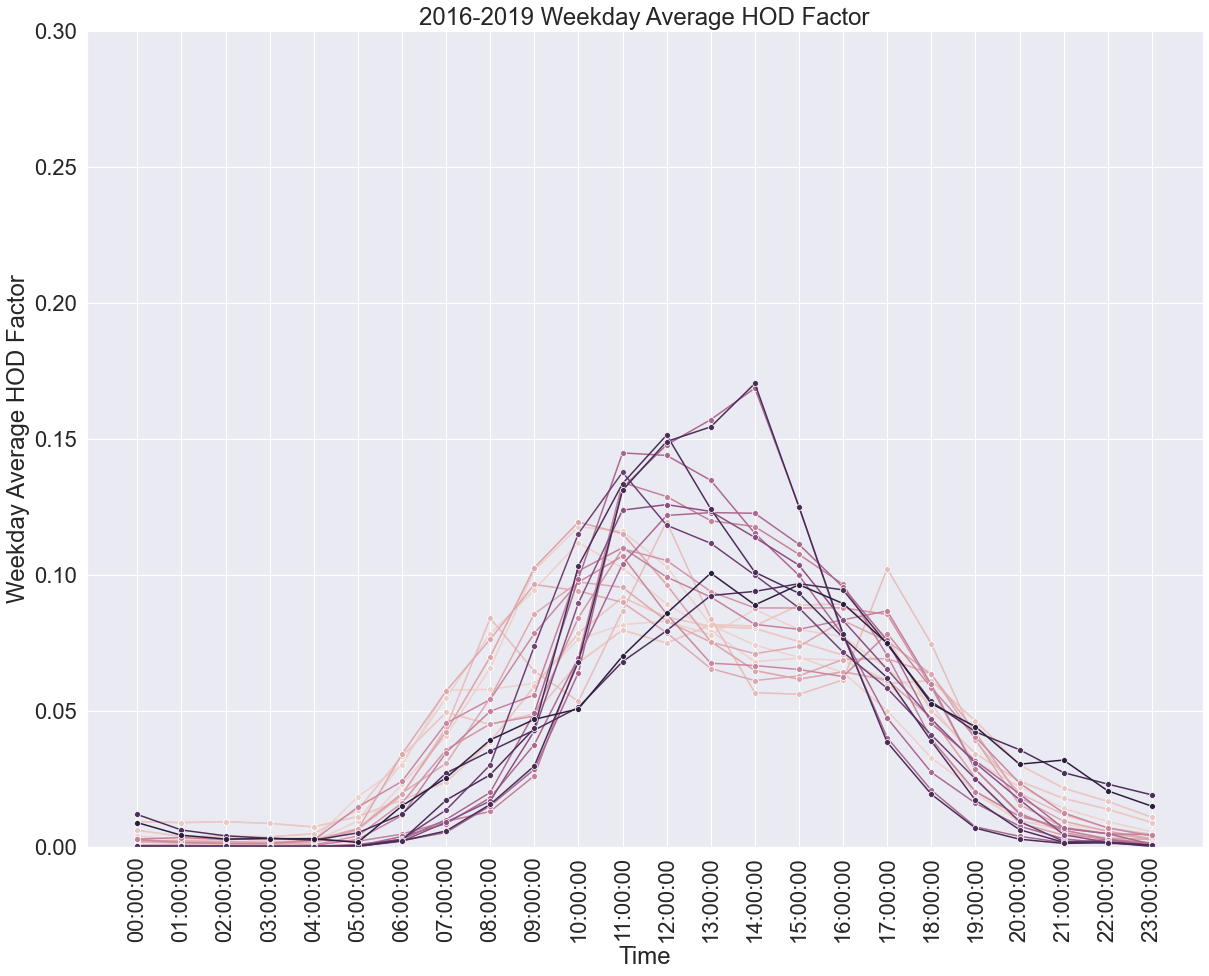

In [385]:
plot(d1)

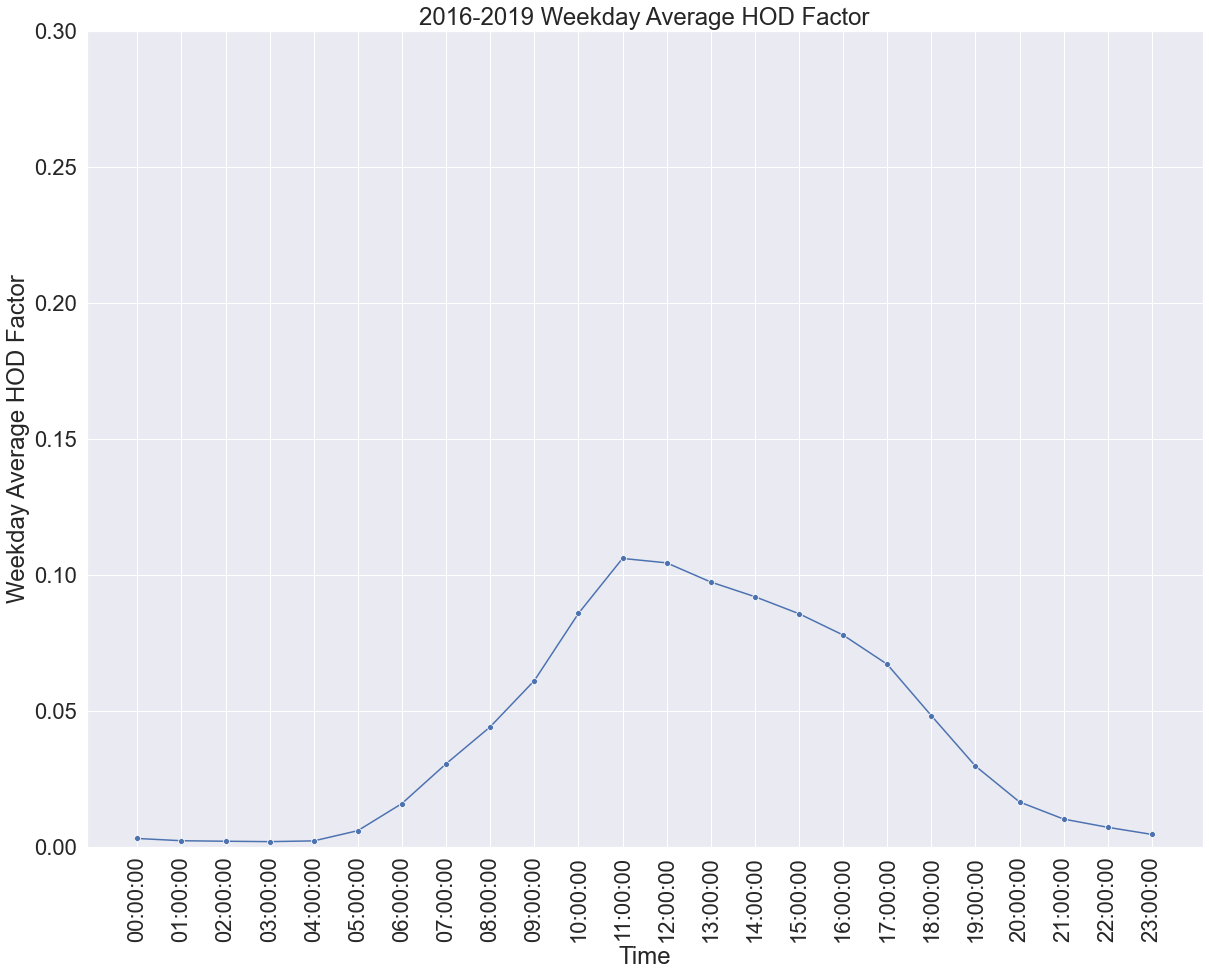

In [386]:
#d1_ave['starttime'] = d1_ave['starttime'].astype(cat_type)
plot_ave(d1_ave)

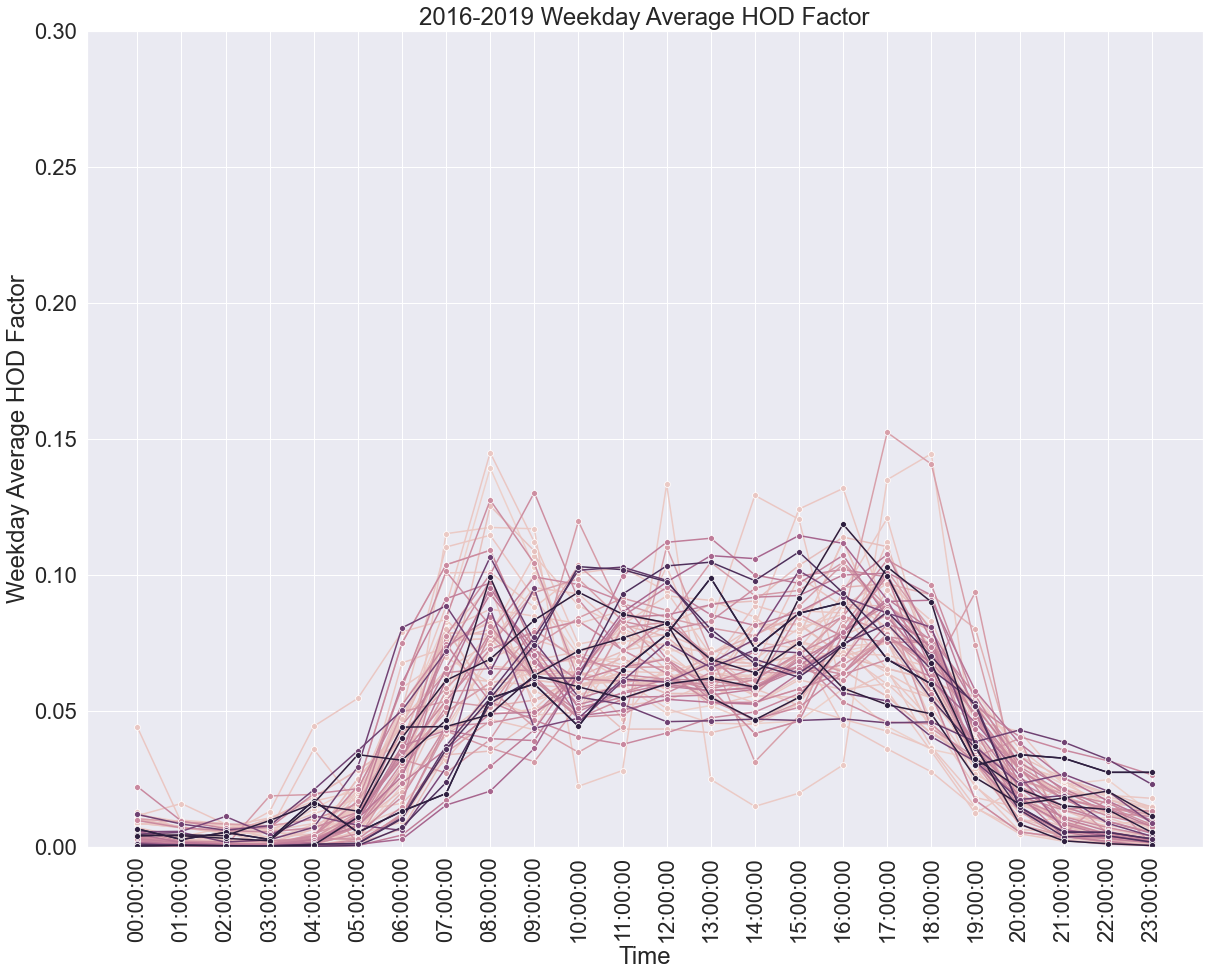

In [387]:
plot(d2)

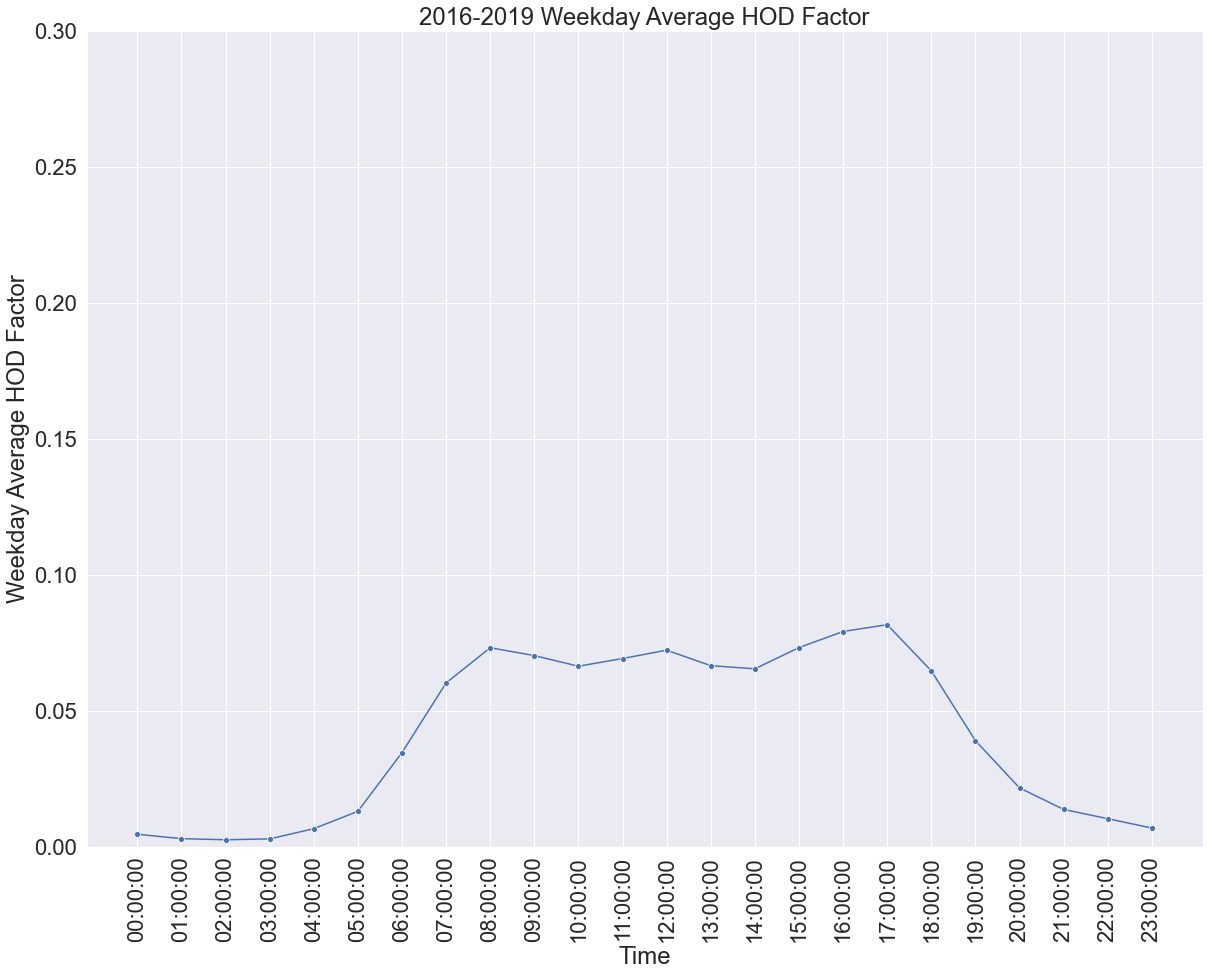

In [388]:
#d2_ave['starttime'] = d2_ave['starttime'].astype(cat_type)
plot_ave(d2_ave)

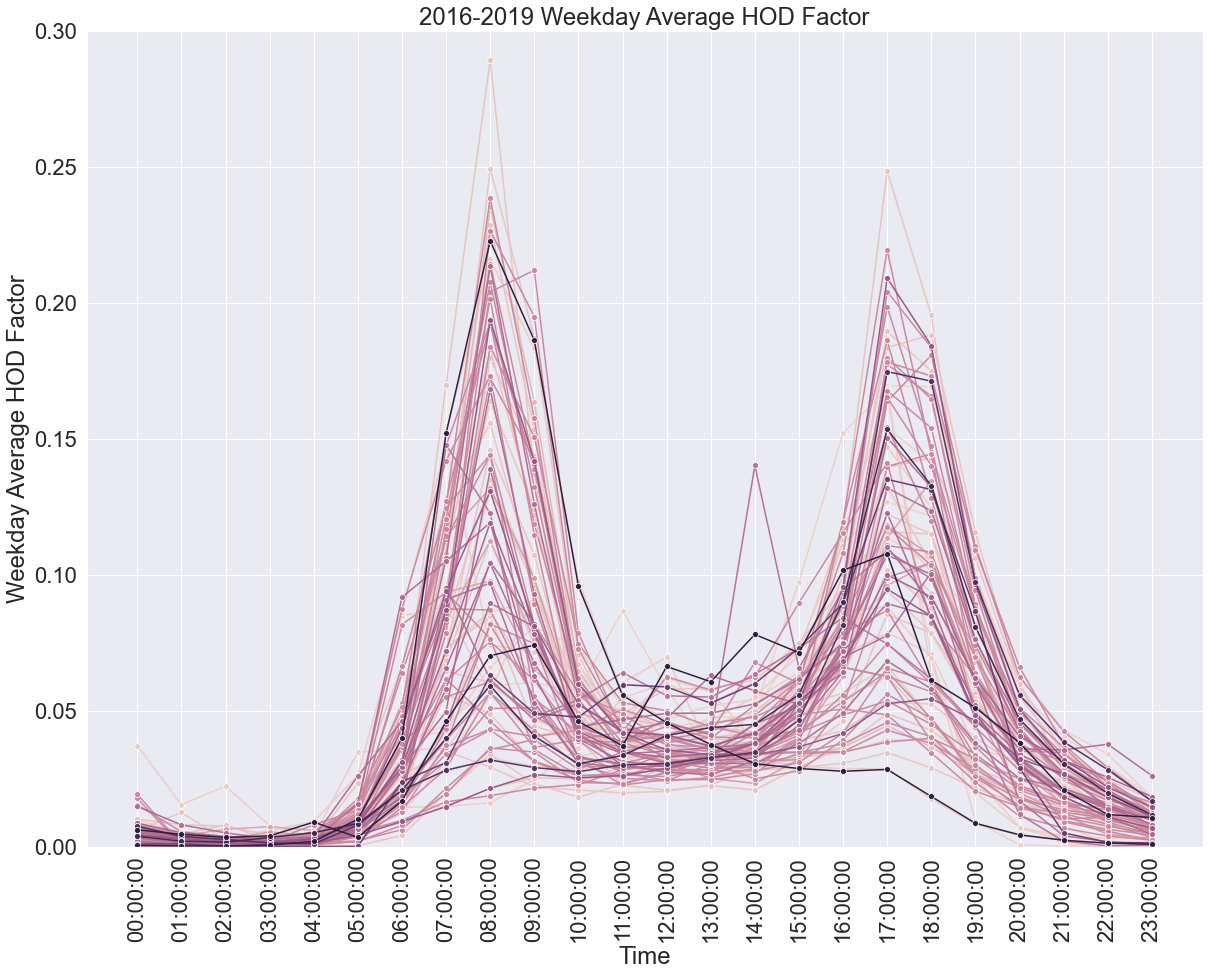

In [389]:
plot(d3)

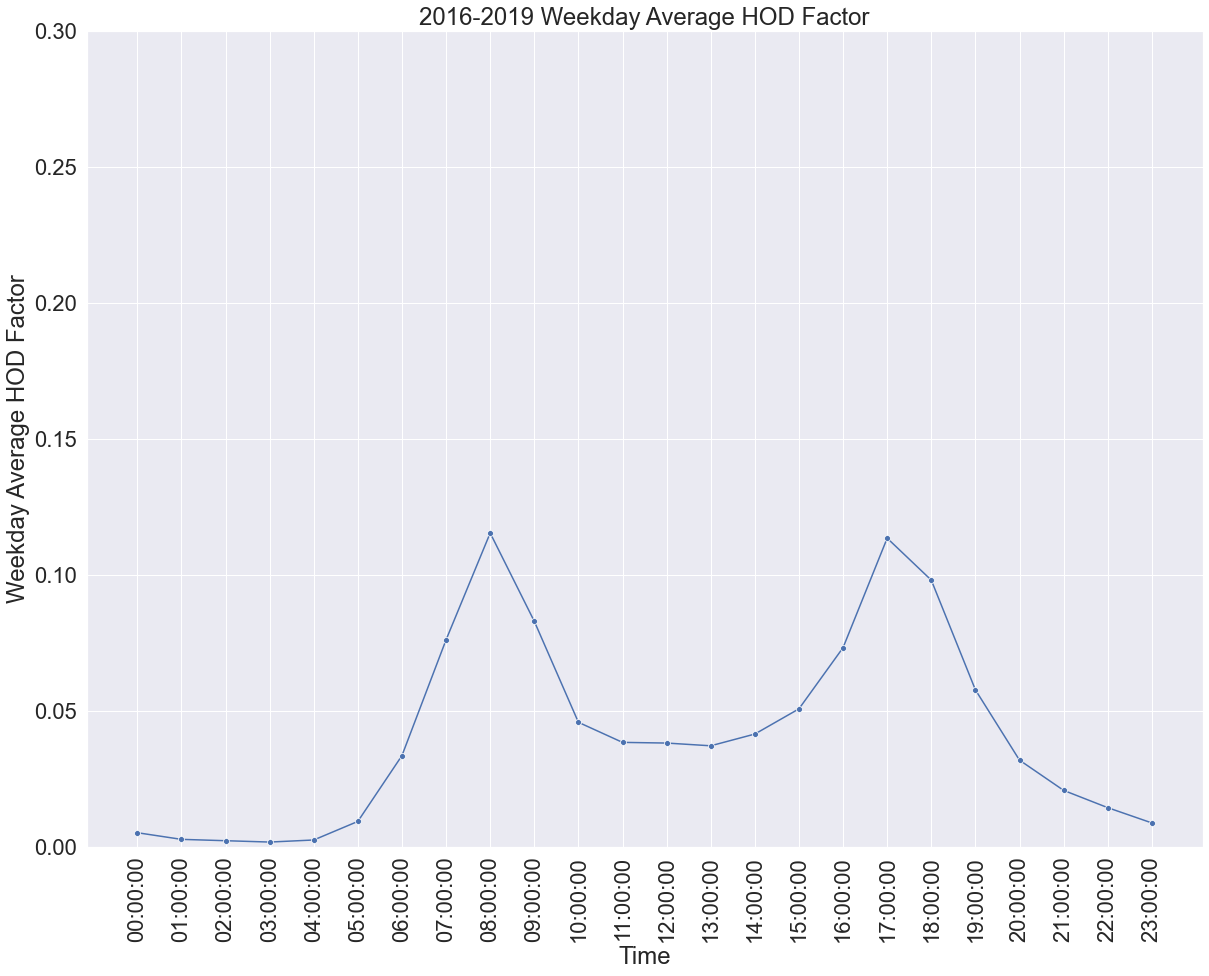

In [390]:
#d3_ave['starttime'] = d3_ave['starttime'].astype(cat_type)
plot_ave(d3_ave)

In [391]:
d1_ave=d1_ave.sort_values(by=['starttime'])
d2_ave=d2_ave.sort_values(by=['starttime'])
d3_ave=d3_ave.sort_values(by=['starttime'])

# Export Final HOD Factor

In [392]:
d1_ave['Criteria']='Max_AMI_PMI<=1'
d2_ave['Criteria']='1<Max_AMI_PMI<=2.5'
d3_ave['Criteria']='Max_AMI_PMI>2.5'
Final_weekday_HOD=pd.concat([d1_ave,d2_ave,d3_ave],axis=0)
Final_weekday_HOD['day_of_status']='weekday'
Final_weekday_HOD.to_csv('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Final Factor/Weekday_HOD_Factor.csv')

In [393]:
d1_ave.dtypes

starttime                    object
Average_Group_HOD_Factor    float64
Criteria                     object
dtype: object

# Separate weekend Pattern using Max weekday AMI_PMI Value threshold

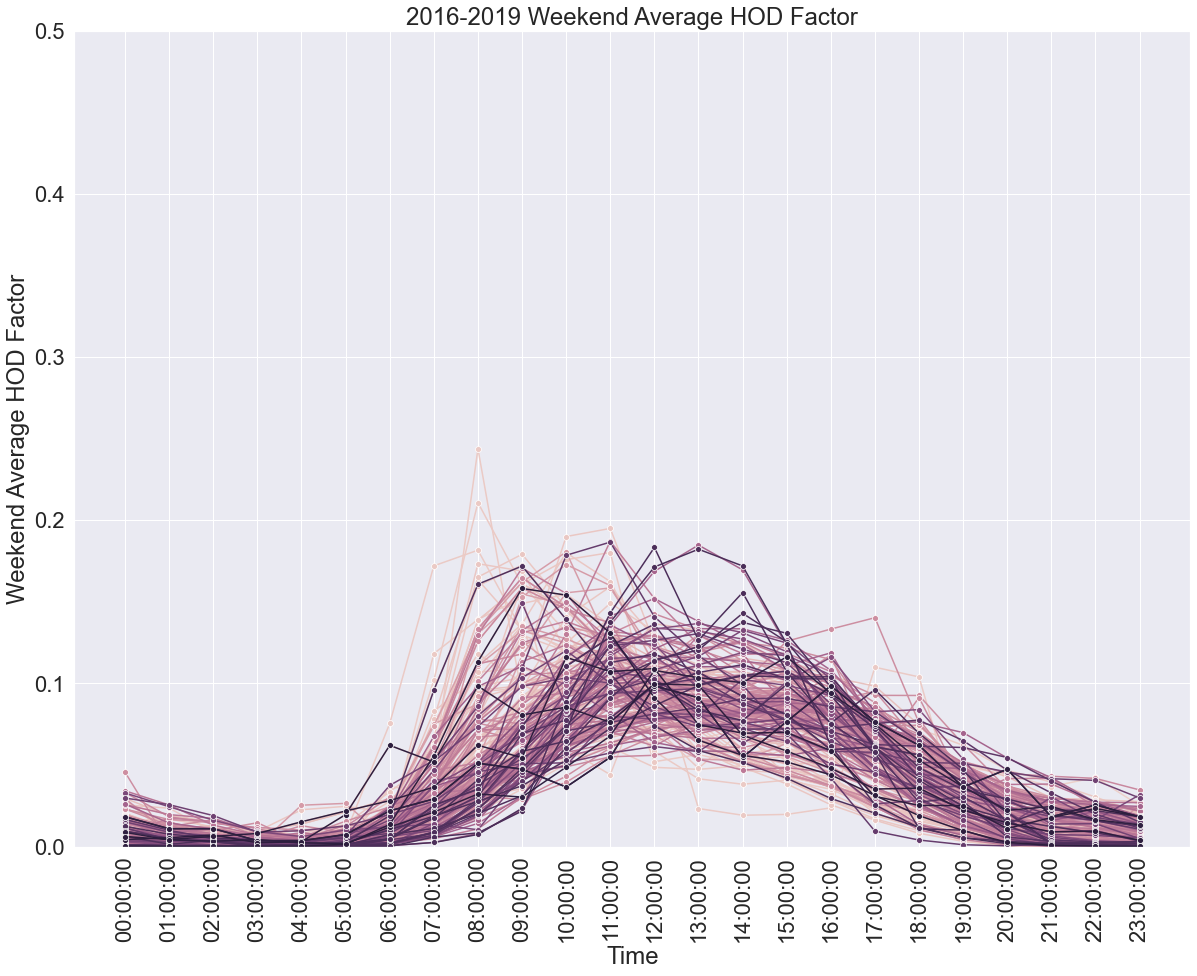

In [394]:
sns.set(rc={'figure.figsize':(20,15)})
sns.set(font_scale=2.0)
import seaborn as sns


#fig, ax = plt.subplots(2,2)

ax=sns.lineplot(x=doh_weekend_factor['starttime'],y=doh_weekend_factor['Average_Yearly_HOD_Factor'],hue=doh_weekend_factor['ID'],
                   markers=True,marker="o", dashes=False,sort=True) 
plt.xticks(rotation = 'vertical')
ax.set(ylim=(0, 0.50))
ax.get_legend().remove()
ax.title.set_text('2016-2019 Weekend Average HOD Factor')
ax.set_ylabel('Weekend Average HOD Factor' )
ax.set_xlabel('Time')
plt.show()

In [395]:
max_ami_pmi_rec=pd.DataFrame({'Average_stv_rec_ratio':ind.groupby(['ID'])['stv_rec_ratio'].mean()}).reset_index()
max_ami_pmi_rec.shape

(180, 2)

In [396]:
max_ami_pmi_com=pd.DataFrame({'Average_stv_com_ratio':ind.groupby(['ID'])['stv_com_ratio'].mean()}).reset_index()
max_ami_pmi_com.shape

(180, 2)

In [397]:
max_ami_pmi_weekend=pd.merge(max_ami_pmi_rec,max_ami_pmi_com, left_on=['ID'],right_on=['ID'],how='inner')

In [398]:
max_ami_pmi_weekend.describe()

ID  Average_stv_rec_ratio  Average_stv_com_ratio
count    180.000000             158.000000             158.000000
mean   17284.811111               0.719733               0.280267
std    15171.395098               0.219111               0.219111
min      671.000000               0.255080               0.000000
25%     3869.500000               0.549648               0.098058
50%    18373.500000               0.782418               0.217582
75%    22753.000000               0.901942               0.450352
max    59066.000000               1.000000               0.744920

In [399]:
weekend_data=pd.merge(doh_weekend_factor,max_ami_pmi_weekend, left_on=['ID'],right_on=['ID'],how='inner')
weekend_data.columns

Index(['Unnamed: 0', 'ID', 'starttime', 'Average_Yearly_HOD_Factor',
       'Average_stv_rec_ratio', 'Average_stv_com_ratio'],
      dtype='object')

In [400]:
c=weekend_data.loc[weekend_data['Average_Yearly_HOD_Factor']>0.25]
c

Empty DataFrame
Columns: [Unnamed: 0, ID, starttime, Average_Yearly_HOD_Factor, Average_stv_rec_ratio, Average_stv_com_ratio]
Index: []

In [401]:
#weekend_data1=weekend_data.loc[weekend_data['ID']!=50994]
#weekend_data2=weekend_data1.loc[weekend_data1['ID']!=50997]

In [402]:
def plot_weekend (weekend_data):
    import seaborn as sns
    sns.set(rc={'figure.figsize':(20,15)})
    sns.set(font_scale=2.0)



    #fig, ax = plt.subplots(2,2)

    ax=sns.lineplot(x=weekend_data['starttime'],y=weekend_data['Average_Yearly_HOD_Factor'],hue=weekend_data['ID'],
                       markers=True,marker="o", dashes=False,sort=True) 
    plt.xticks(rotation = 'vertical')
    ax.set(ylim=(0, 0.30))
    ax.get_legend().remove()
    ax.title.set_text('2016-2019 Weekend Average HOD Factor')
    ax.set_ylabel('Weekend Average HOD Factor' )
    ax.set_xlabel('Time')
    plt.show()

In [403]:
def plot_weekend_ave (weekend_data):
    import seaborn as sns
    sns.set(rc={'figure.figsize':(20,15)})
    sns.set(font_scale=2.0)



    #fig, ax = plt.subplots(2,2)

    ax=sns.lineplot(x=weekend_data['starttime'],y=weekend_data['Average_Group_HOD_Factor'],
                       markers=True,marker="o", dashes=False,sort=True) 
    plt.xticks(rotation = 'vertical')
    ax.set(ylim=(0, 0.30))
    ax.title.set_text('2016-2019 Weekend Average HOD Factor')
    ax.set_ylabel('Weekend Average HOD Factor' )
    ax.set_xlabel('Time')
    plt.show()

In [404]:
d1w=weekend_data.loc[weekend_data['Average_stv_rec_ratio']<=0.75]
d1w_ave=pd.DataFrame({'Average_Group_HOD_Factor':d1w.groupby(['starttime'])['Average_Yearly_HOD_Factor'].mean()}).reset_index()
#d2w=weekend_data2[(weekend_data2.Average_stv_rec_ratio>0.6)& (weekend_data2.Average_stv_rec_ratio<=0.90) ]
#d3=weekend_data[(weekend_data.Average_max_ami_pmi>2.5)& (weekend_data.Average_max_ami_pmi<=3.5) ]
d2w=weekend_data.loc[weekend_data['Average_stv_rec_ratio']>0.75]
d2w_ave=pd.DataFrame({'Average_Group_HOD_Factor':d2w.groupby(['starttime'])['Average_Yearly_HOD_Factor'].mean()}).reset_index()

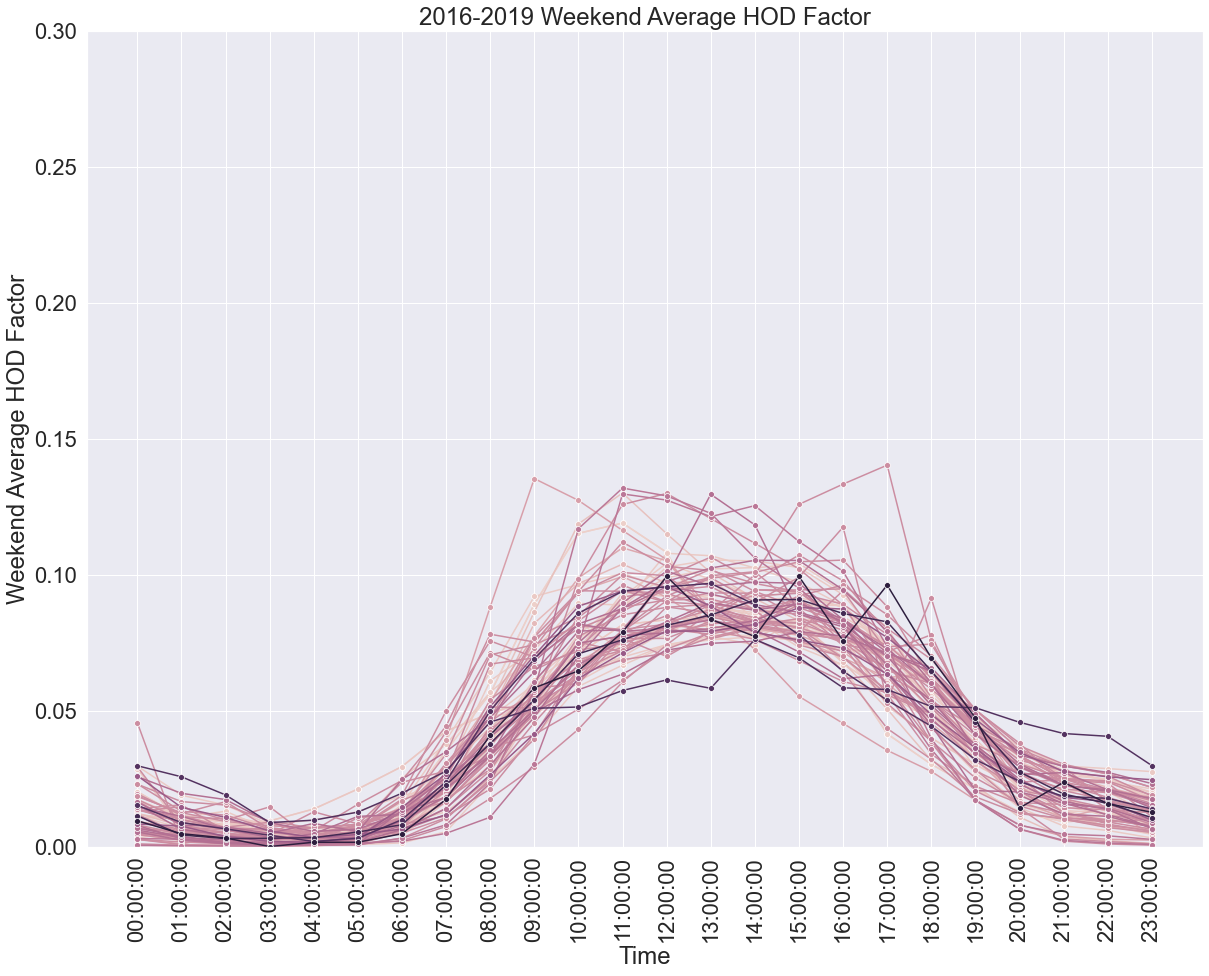

In [405]:
plot_weekend(d1w)

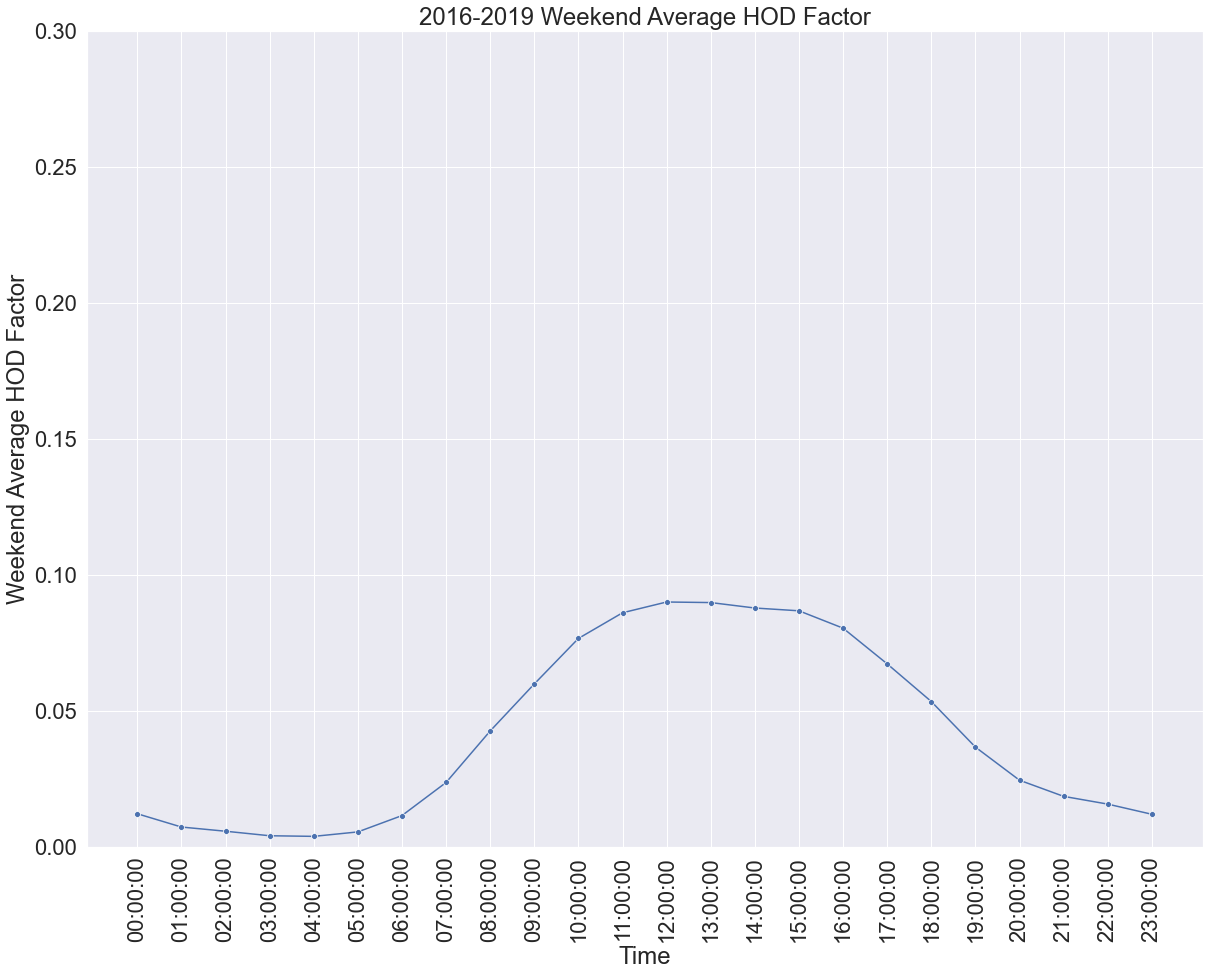

In [406]:
#d1w_ave['starttime'] = d1w_ave['starttime'].astype(cat_type)
plot_weekend_ave(d1w_ave)

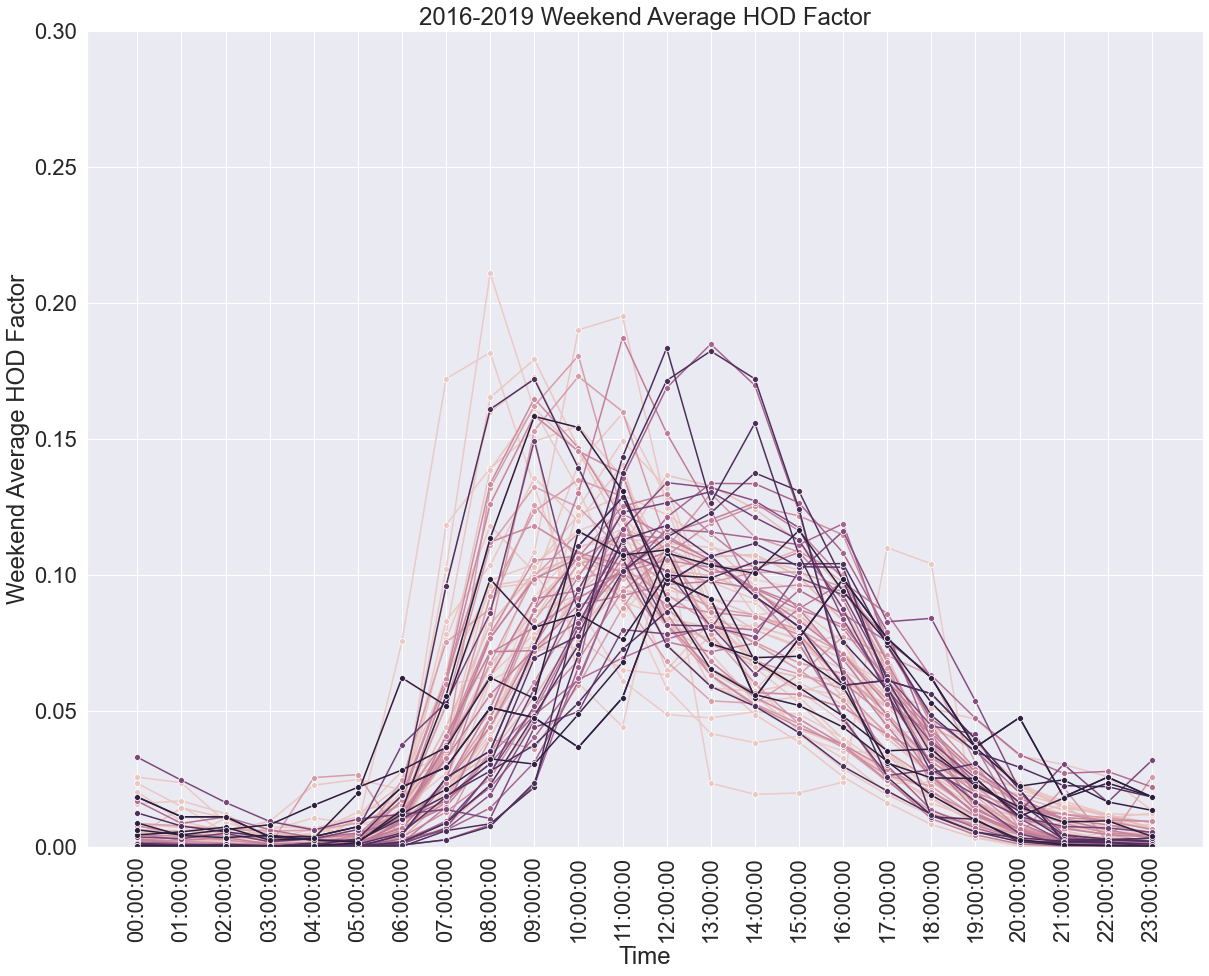

In [407]:
plot_weekend(d2w)

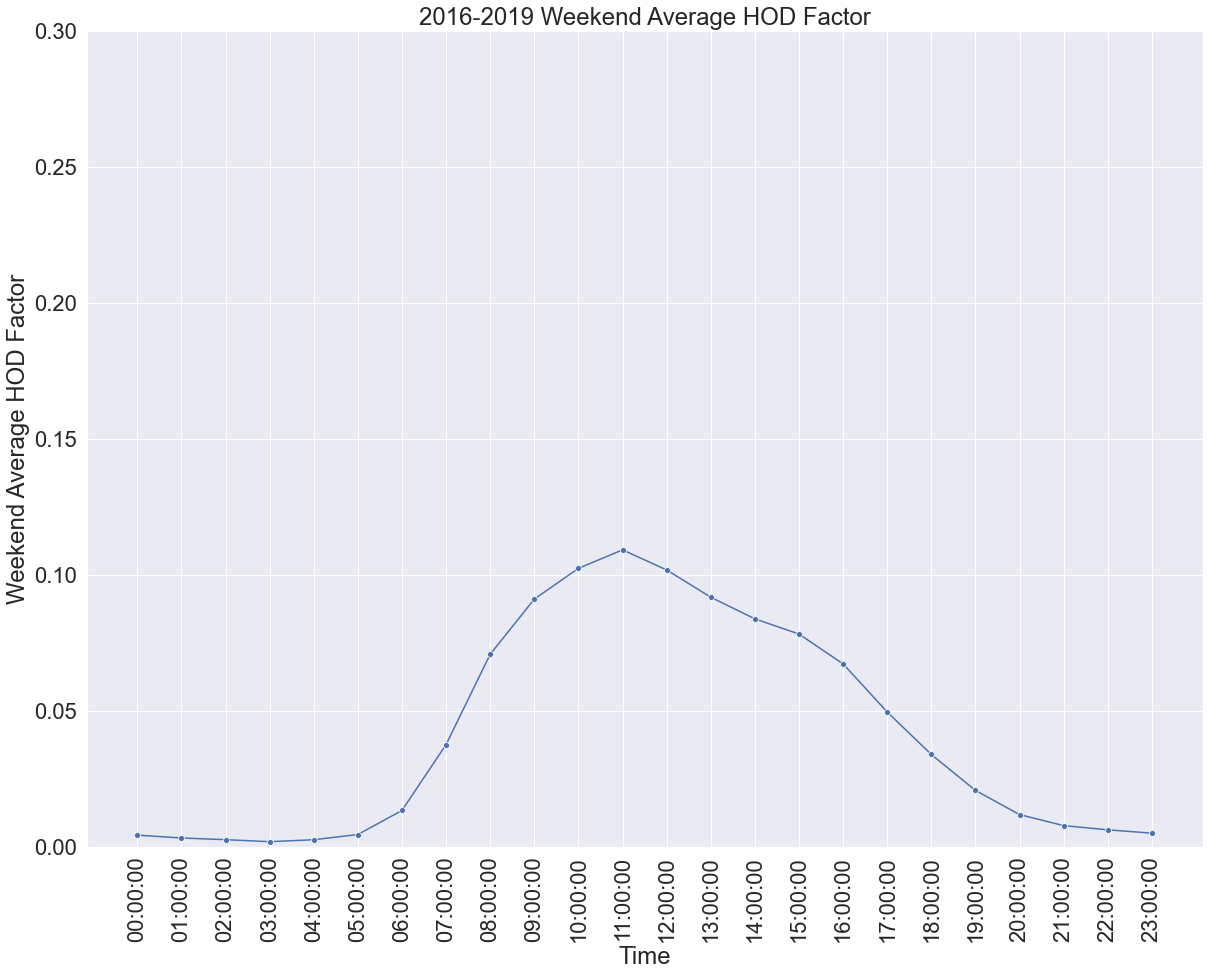

In [408]:
#d2w_ave['starttime'] = d2w_ave['starttime'].astype(cat_type)
plot_weekend_ave(d2w_ave)

In [409]:
# Import Final HOD Factor for weekend
d1w_ave=d1w_ave.sort_values(by=['starttime'])
d2w_ave=d2w_ave.sort_values(by=['starttime'])
d2w_ave.head(2)

starttime  Average_Group_HOD_Factor
0  00:00:00                  0.004203
1  01:00:00                  0.003149

In [410]:
d1w_ave['Criteria']='Average_stv_rec_ratio<=0.75'
d1w_ave['Criteria']='Average_stv_rec_ratio>0.75'
Final_weekend_HOD=pd.concat([d1w_ave,d1w_ave],axis=0)
Final_weekend_HOD['day_of_status']='weekend'
Final_HOD=pd.concat([Final_weekday_HOD,Final_weekend_HOD],axis=0)
Final_HOD.to_csv('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Final Factor/Final_HOD_Factor.csv')

# Break Down DOW Factor Pattern based on WWI Index 0.4 amd >0.4

In [411]:
DOW=pd.read_csv('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Processed Data/four_year_ave_DOW.csv')
DOW.head()

Unnamed: 0   ID Day of Week  Average_Yearly_DOW_Factor
0           0  671      Monday                   0.112940
1           1  671     Tuesday                   0.119659
2           2  671   Wednesday                   0.109831
3           3  671    Thursday                   0.131505
4           4  671      Friday                   0.122275

In [412]:
ind.columns

Index(['Unnamed: 0.1', 'ID', 'year', 'Max_WWI', 'Average_WWI',
       'Weekday_Aergage_AMI', 'Weekend_Aergage_AMI', 'Average AMI_wday_wend',
       'Max_weekend_AMI', 'Max_weekday_AMI', 'Daily_Max_AMI', 'Daily_Max_PMI',
       'Weekday_Aergage_PMI', 'Weekend_Aergage_PMI', 'Average PMI_wday_wend',
       'Max_weekday_PMI', 'Max_weekend_PMI', 'max_daily_am_pm',
       'max_daily_am_pm_value', 'max_weekend_am_pm', 'max_weekend_am_pm_Value',
       'max_weekday_am_pm', 'max_weekday_am_pm_value', 'seasonal_factor',
       'latitude', 'longitude', 'location', 'road', 'city', 'county', 'state',
       'country', 'Unnamed: 0', 'edgeUID', 'osmId', 'stv_total',
       'stv_com_total', 'stv_rec_total', 'stv_com_ratio', 'stv_rec_ratio'],
      dtype='object')

In [413]:
ave_wwi=pd.DataFrame({'Average_wwi':ind.groupby(['ID'])['Average_WWI'].mean()}).reset_index()
ave_wwi.shape

(180, 2)

In [414]:
DOW.shape, ind.shape

((1505, 4), (588, 40))

In [415]:
DOW_ind=pd.merge(DOW,ave_wwi,left_on=['ID'],right_on=['ID'],how='inner')
DOW_ind.shape

(1260, 5)

In [416]:
from pandas.api.types import CategoricalDtype
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
DOW_ind['Day of Week'] = DOW_ind['Day of Week'].astype(cat_type)

In [417]:
def DOW_plot (DOW_ind):
    import seaborn as sns
    sns.set(rc={'figure.figsize':(20,15)})
    sns.set(font_scale=2.0)



    #fig, ax = plt.subplots(2,2)

    ax=sns.lineplot(x=DOW_ind['Day of Week'],y=DOW_ind['Average_Yearly_DOW_Factor'],hue=DOW_ind['ID'],
                       markers=True,marker="o", dashes=False,sort=True) 
    plt.xticks(rotation = 'vertical')
    ax.set(ylim=(0, 0.40))
    ax.get_legend().remove()
    ax.title.set_text('2016-2019 Average DOW Factor')
    ax.set_ylabel('Average DOW Factor' )
    ax.set_xlabel('Day of Week')
    plt.show()

In [418]:
def DOW_plot_ave (DOW_ind):
    import seaborn as sns
    
    sns.set(rc={'figure.figsize':(20,15)})
    sns.set(font_scale=2.0)



    #fig, ax = plt.subplots(2,2)

    ax=sns.lineplot(x=DOW_ind['Day of Week'],y=DOW_ind['Average_Group_DOW_Factor'],
                       markers=True,marker="o", dashes=False,sort=True) 
    plt.xticks(rotation = 'vertical')
    ax.set(ylim=(0, 0.40))
    ax.title.set_text('2016-2019 Average DOW Factor')
    ax.set_ylabel('Average DOW Factor' )
    ax.set_xlabel('Day of Week')
    plt.show()

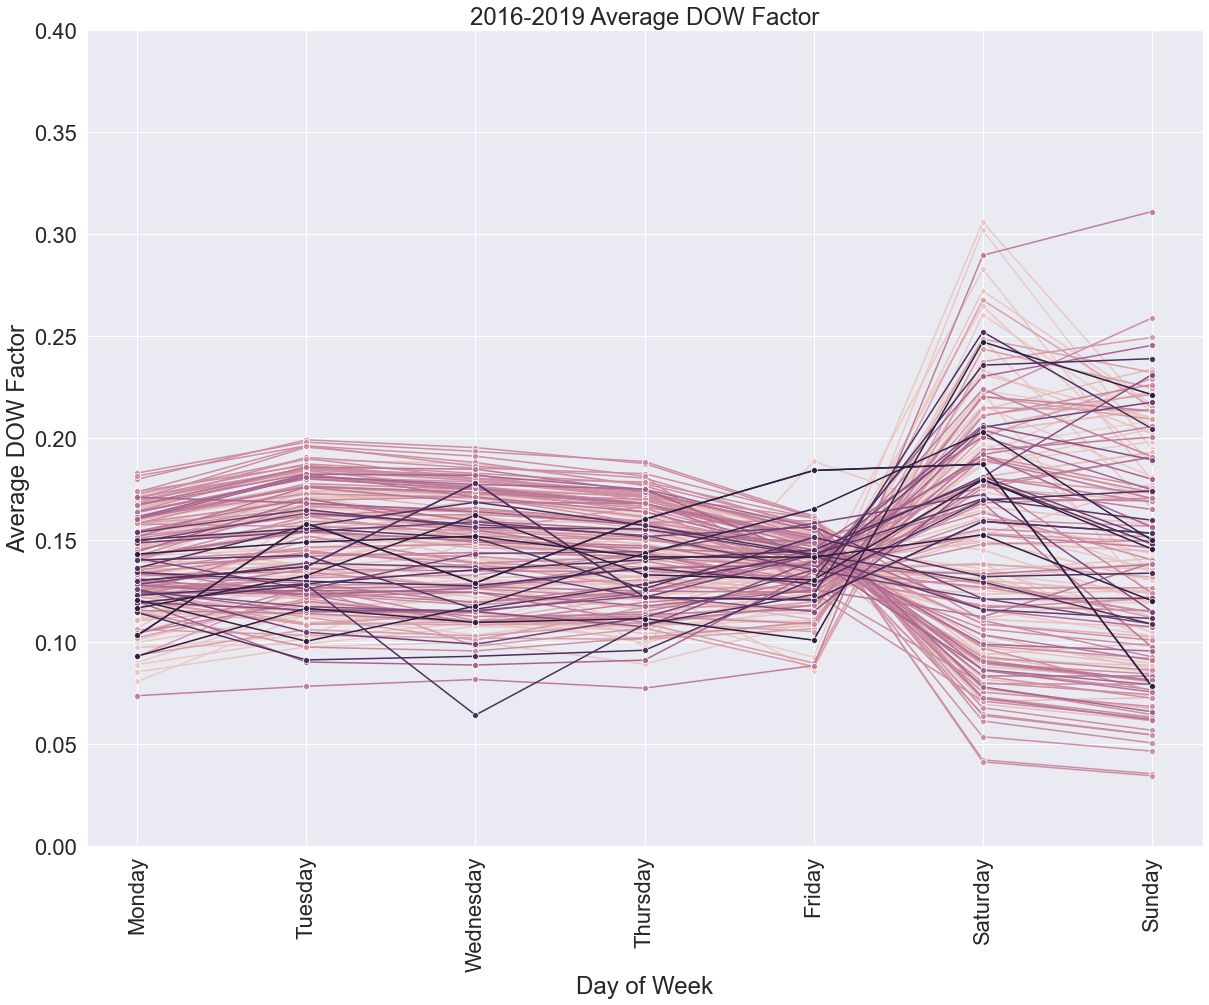

In [419]:
DOW_plot(DOW_ind)

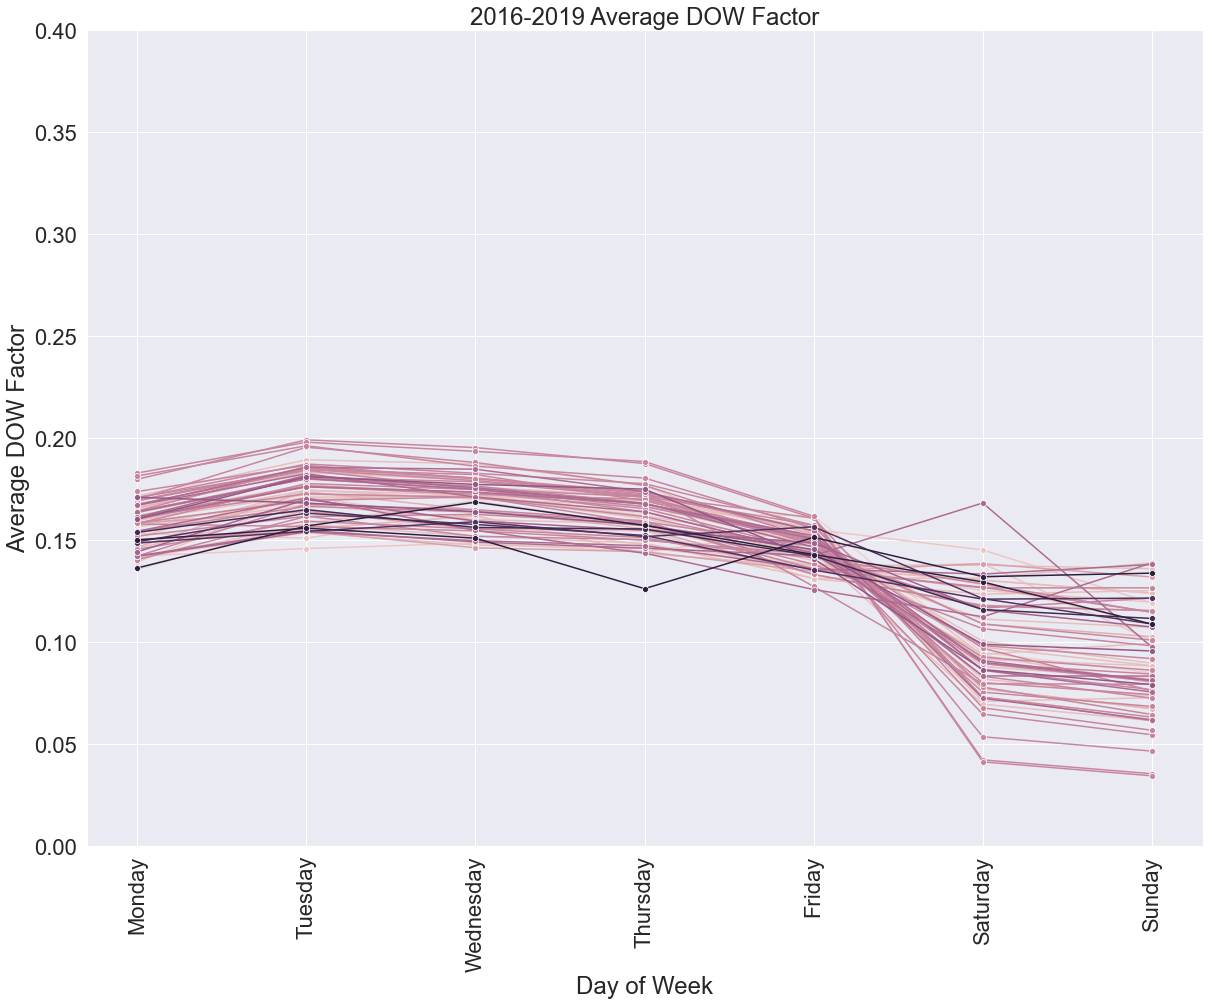

In [420]:
dow1=DOW_ind.loc[DOW_ind['Average_wwi']<=0.40]
dow1_ave=pd.DataFrame({'Average_Group_DOW_Factor':dow1.groupby(['Day of Week'])['Average_Yearly_DOW_Factor'].mean()}).reset_index()
DOW_plot(dow1)

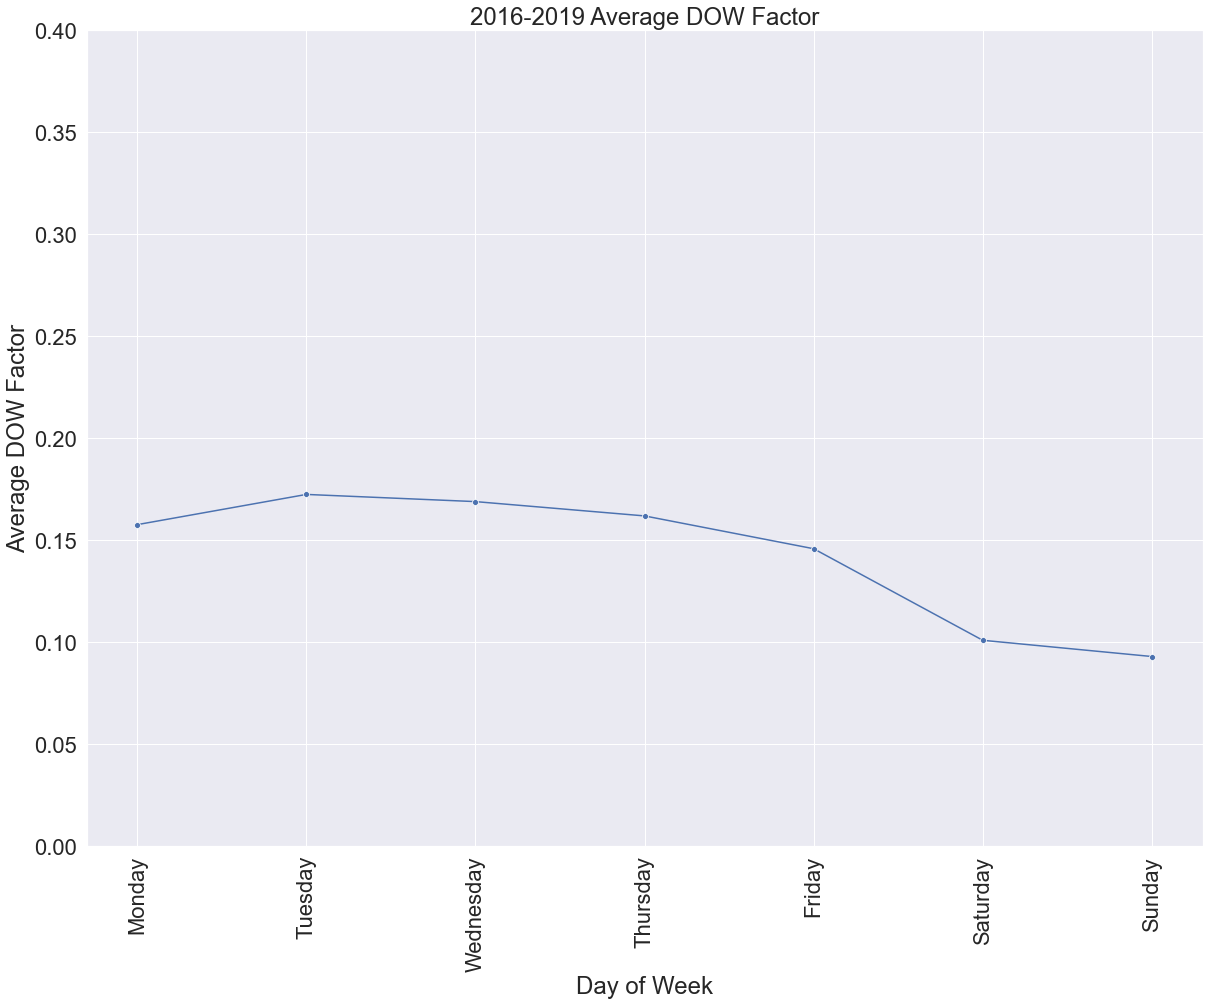

In [421]:
DOW_plot_ave(dow1_ave)

In [422]:
#dow2=DOW_ind[(DOW_ind.Average_wwi>0.35) & (DOW_ind.Average_wwi<=0.90)]
#DOW_plot(dow2)

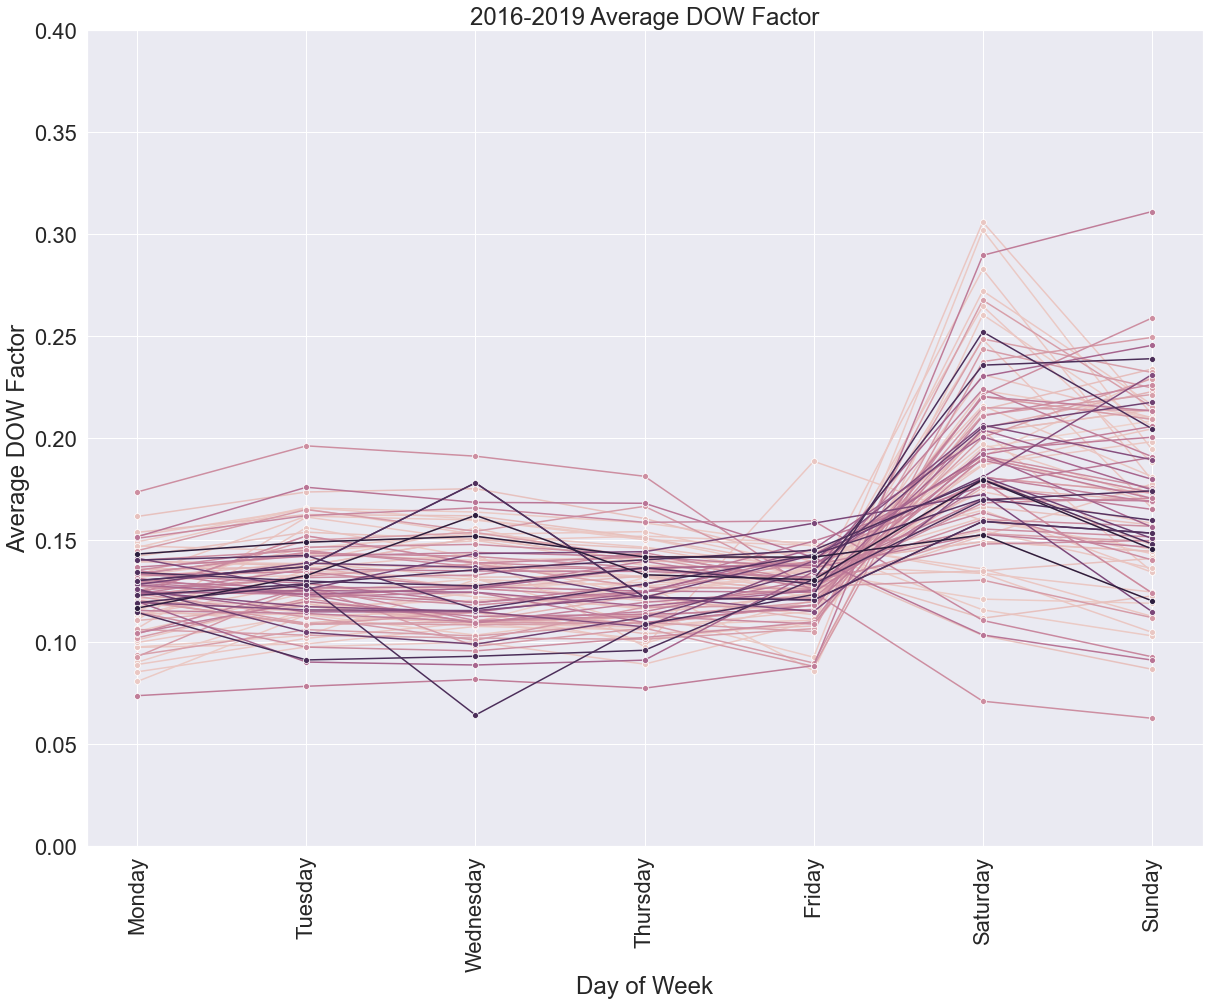

In [423]:
dow2=DOW_ind.loc[DOW_ind['Average_wwi']>0.40]
dow2_ave=pd.DataFrame({'Average_Group_DOW_Factor':dow2.groupby(['Day of Week'])['Average_Yearly_DOW_Factor'].mean()}).reset_index()
DOW_plot(dow2)

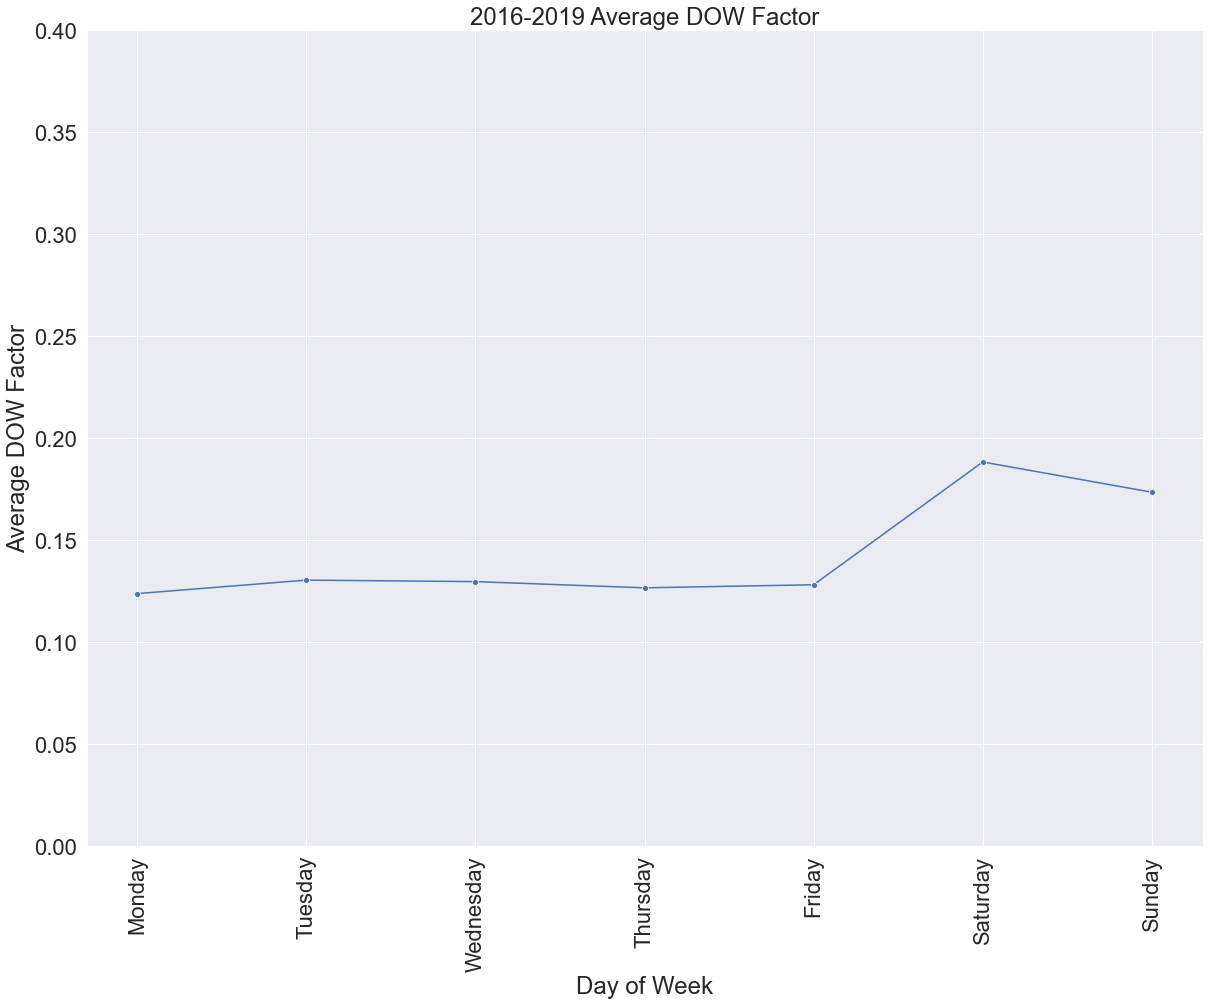

In [424]:
DOW_plot_ave(dow2_ave)

In [425]:
# export final DOW factor
dow1_ave['criteria']='WWI<=0.40'
dow2_ave['criteria']='WWI>0.40'
final_wwi=pd.concat([dow1_ave,dow2_ave],axis=0)
final_wwi.to_csv('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Final Factor/Final_DOW_Factor.csv')

# Breakdown MOY Pattern by seasonality factor

In [426]:
moy=pd.read_csv('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Processed Data/four_year_ave_MOY.csv')
moy.head()

Unnamed: 0   ID  month  Average_Yearly_MOY_Factor
0           0  671      1                   0.073279
1           1  671      2                   0.064814
2           2  671      3                   0.074801
3           3  671      4                   0.087330
4           4  671      5                   0.101495

In [427]:
moy.loc[moy['Average_Yearly_MOY_Factor']>0.25]

Empty DataFrame
Columns: [Unnamed: 0, ID, month, Average_Yearly_MOY_Factor]
Index: []

In [428]:
moy.loc[moy['ID']==51027]

Unnamed: 0     ID  month  Average_Yearly_MOY_Factor
2043        2043  51027      1                   0.028446
2044        2044  51027      2                   0.030674
2045        2045  51027      3                   0.017185
2046        2046  51027      4                   0.092845
2047        2047  51027      5                   0.135015
2048        2048  51027      6                   0.188739
2049        2049  51027      8                   0.190147
2050        2050  51027      9                   0.160880
2051        2051  51027     10                   0.097478
2052        2052  51027     11                   0.053431
2053        2053  51027     12                   0.005161

In [429]:
ind.columns

Index(['Unnamed: 0.1', 'ID', 'year', 'Max_WWI', 'Average_WWI',
       'Weekday_Aergage_AMI', 'Weekend_Aergage_AMI', 'Average AMI_wday_wend',
       'Max_weekend_AMI', 'Max_weekday_AMI', 'Daily_Max_AMI', 'Daily_Max_PMI',
       'Weekday_Aergage_PMI', 'Weekend_Aergage_PMI', 'Average PMI_wday_wend',
       'Max_weekday_PMI', 'Max_weekend_PMI', 'max_daily_am_pm',
       'max_daily_am_pm_value', 'max_weekend_am_pm', 'max_weekend_am_pm_Value',
       'max_weekday_am_pm', 'max_weekday_am_pm_value', 'seasonal_factor',
       'latitude', 'longitude', 'location', 'road', 'city', 'county', 'state',
       'country', 'Unnamed: 0', 'edgeUID', 'osmId', 'stv_total',
       'stv_com_total', 'stv_rec_total', 'stv_com_ratio', 'stv_rec_ratio'],
      dtype='object')

In [430]:
ses_pa=pd.DataFrame({'Average_seasonal_factor':ind.groupby(['ID'])['seasonal_factor'].mean()}).reset_index()
ses_pa.shape

(180, 2)

In [431]:
ses_pa.loc[ses_pa['Average_seasonal_factor']>2.4]

ID  Average_seasonal_factor
78   13426                 3.952222
91   18375                 2.618934
137  23305                 3.185739
138  23307                 2.707599
151  30664                34.761149
152  30665                26.673336
158  39406                 2.480814
159  41347                 2.708938
163  44181                18.156301
166  49628                 8.136530
167  50992                14.803411
168  51027                13.119186

In [432]:
ses_pa['Average_seasonal_factor'].max()

34.76114936985585

In [433]:
# extract seasonality factor to classify geographically
uniq_lat_long=ind.drop_duplicates(subset=['ID'], keep='first')
uniq_lat_long1=uniq_lat_long[['ID','latitude', 'longitude','location', 'road', 'city', 'county', 'state','country' ]]
graphical_seasonality=pd.merge(uniq_lat_long1,ses_pa,left_on=['ID'],right_on=['ID'],how='inner')
graphical_seasonality.to_csv('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Processed Data/four_year_average_seasonality.csv')

In [434]:
MOY_ind=pd.merge(moy,ses_pa,left_on=['ID'],right_on=['ID'],how='inner')
MOY_ind.head()

Unnamed: 0   ID  month  Average_Yearly_MOY_Factor  Average_seasonal_factor
0           0  671      1                   0.073279                 1.268874
1           1  671      2                   0.064814                 1.268874
2           2  671      3                   0.074801                 1.268874
3           3  671      4                   0.087330                 1.268874
4           4  671      5                   0.101495                 1.268874

In [435]:
check_anomally=MOY_ind.loc[MOY_ind['Average_seasonal_factor']>3]
check_anomally

Unnamed: 0     ID  month  Average_Yearly_MOY_Factor  \
776          800  13426      1                   0.032561   
777          801  13426      2                   0.038792   
778          802  13426      3                   0.070286   
779          803  13426      4                   0.119192   
780          804  13426      5                   0.137128   
781          805  13426      6                   0.112188   
782          806  13426      7                   0.098018   
783          807  13426      8                   0.093536   
784          808  13426      9                   0.102029   
785          809  13426     10                   0.094865   
786          810  13426     11                   0.059186   
787          811  13426     12                   0.042218   
1460        1580  23305      1                   0.045090   
1461        1581  23305      2                   0.045310   
1462        1582  23305      3                   0.064490   
1463        1583  23305      4                   0.065760   
1464        1584  23305      5                   0.137694   
1465        1585  23305      6                   0.215124   
1466        1586  23305      7                   0.108889   
1467        1587  23305      8                   0.105138   
1468        1588  23305      9                   0.065212   
1469        1589  23305     10                   0.058008   
1470        1590  23305     11                   0.039056   
1471        1591  23305     12                   0.050230   
1628        1820  30665      1                   0.018814   
1629        1821  30665      2                   0.011408   
1630        1822  30665      3                   0.005129   
1631        1823  30665      4                   0.044393   
1632        1824  30665      5                   0.086576   
1633        1825  30665      6                   0.189843   
1634        1826  30665      7                   0.241267   
1635        1827  30665      8                   0.188539   
1636        1828  30665      9                   0.119031   
1637        1829  30665     10                   0.053038   
1638        1830  30665     11                   0.038380   
1639        1831  30665     12                   0.003582   
1711        2020  50992      1                   0.017087   
1712        2021  50992      2                   0.013849   
1713        2022  50992      3                   0.009905   
1714        2023  50992      4                   0.033528   
1715        2024  50992      5                   0.074107   
1716        2025  50992      6                   0.177850   
1717        2026  50992      7                   0.245824   
1718        2027  50992      8                   0.190317   
1719        2028  50992      9                   0.130654   
1720        2029  50992     10                   0.063123   
1721        2030  50992     11                   0.031087   
1722        2031  50992     12                   0.012669   
1723        2043  51027      1                   0.028446   
1724        2044  51027      2                   0.030674   
1725        2045  51027      3                   0.017185   
1726        2046  51027      4                   0.092845   
1727        2047  51027      5                   0.135015   
1728        2048  51027      6                   0.188739   
1729        2049  51027      8                   0.190147   
1730        2050  51027      9                   0.160880   
1731        2051  51027     10                   0.097478   
1732        2052  51027     11                   0.053431   
1733        2053  51027     12                   0.005161   

      Average_seasonal_factor  
776                  3.952222  
777                  3.952222  
778                  3.952222  
779                  3.952222  
780                  3.952222  
781                  3.952222  
782                  3.952222  
783                  3.952222  
784                  3.952222  
785                  3.95

In [436]:
def MOY_plot (MOY_ind):
    import seaborn as sns
    sns.set(rc={'figure.figsize':(20,15)})
    sns.set(font_scale=2.0)



    #fig, ax = plt.subplots(2,2)

    ax=sns.lineplot(x=MOY_ind['month'],y=MOY_ind['Average_Yearly_MOY_Factor'],hue=MOY_ind['ID'],
                       markers=True,marker="o", dashes=False,sort=True) 
    plt.xticks(rotation = 'vertical')
    ax.set(ylim=(0, 0.40))
    ax.get_legend().remove()
    ax.title.set_text('2016-2019 Average MOY Factor')
    ax.set_ylabel('Average MOY Factor' )
    ax.set_xlabel('Month')
    plt.show()

In [437]:
def MOY_plot_ave (MOY_ind):
    import seaborn as sns
    sns.set(rc={'figure.figsize':(20,15)})
    sns.set(font_scale=2.0)



    #fig, ax = plt.subplots(2,2)

    ax=sns.lineplot(x=MOY_ind['month'],y=MOY_ind['Average_Group_MOY_Factor'],
                       markers=True,marker="o", dashes=False,sort=True) 
    plt.xticks(rotation = 'vertical')
    ax.set(ylim=(0, 0.40))
    ax.title.set_text('2016-2019 Average MOY Factor')
    ax.set_ylabel('Average MOY Factor' )
    ax.set_xlabel('Month')
    plt.show()

In [472]:
d1m=MOY_ind.loc[MOY_ind['Average_seasonal_factor']<=2.4]
d1m_ave=pd.DataFrame({'Average_Group_MOY_Factor':d1m.groupby(['month'])['Average_Yearly_MOY_Factor'].mean()}).reset_index()
d2m=MOY_ind[(MOY_ind.Average_seasonal_factor>2.4)& (MOY_ind.Average_seasonal_factor<=5) ]
d2m_ave=pd.DataFrame({'Average_Group_MOY_Factor':d2m.groupby(['month'])['Average_Yearly_MOY_Factor'].mean()}).reset_index()
d3m=MOY_ind.loc[MOY_ind['Average_seasonal_factor']>5]
d3m_ave=pd.DataFrame({'Average_Group_MOY_Factor':d3m.groupby(['month'])['Average_Yearly_MOY_Factor'].mean()}).reset_index()

In [473]:
d2m['Average_seasonal_factor'].describe()

count    71.000000
mean      2.945662
std       0.507376
min       2.480814
25%       2.618934
50%       2.707599
75%       3.185739
max       3.952222
Name: Average_seasonal_factor, dtype: float64

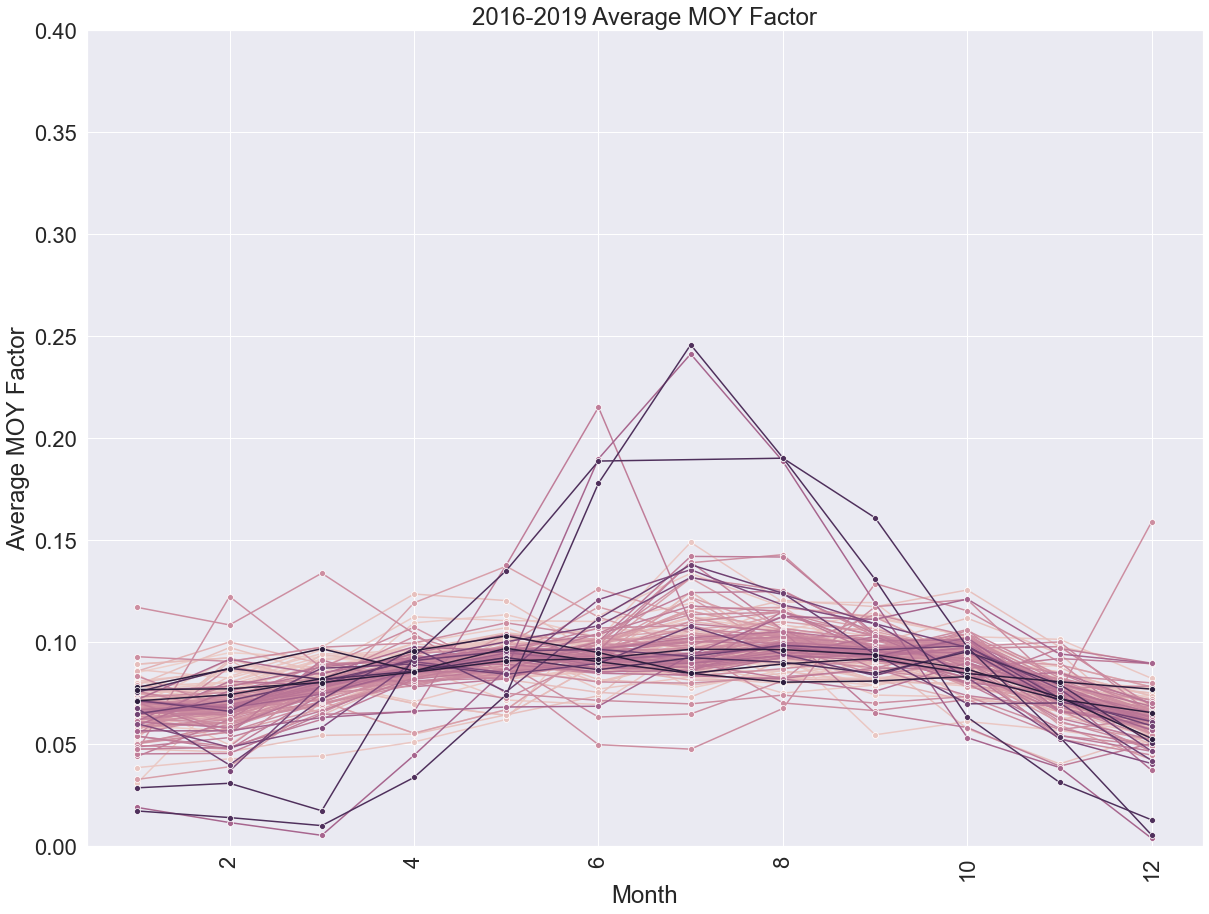

In [474]:
# all four years
MOY_plot(MOY_ind)

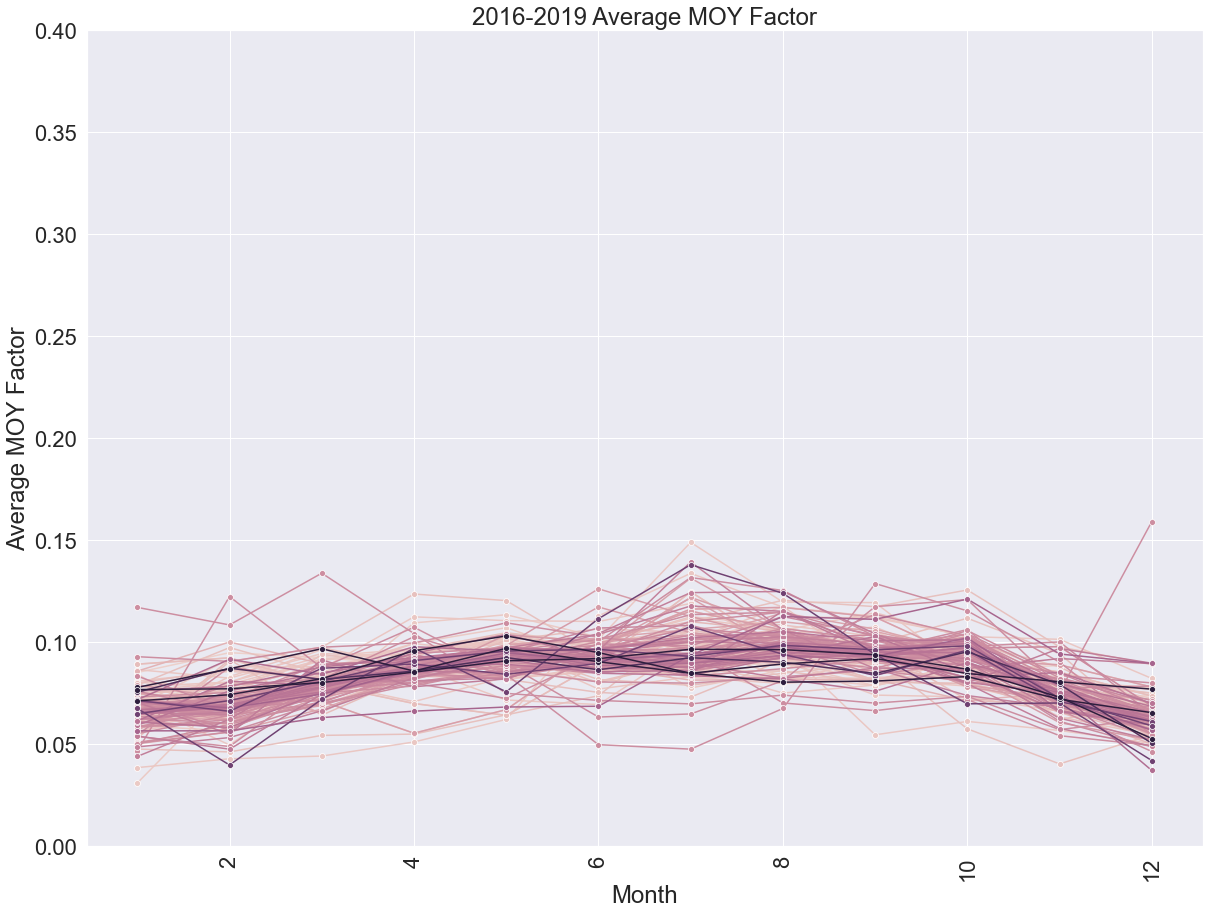

In [475]:
MOY_plot(d1m)

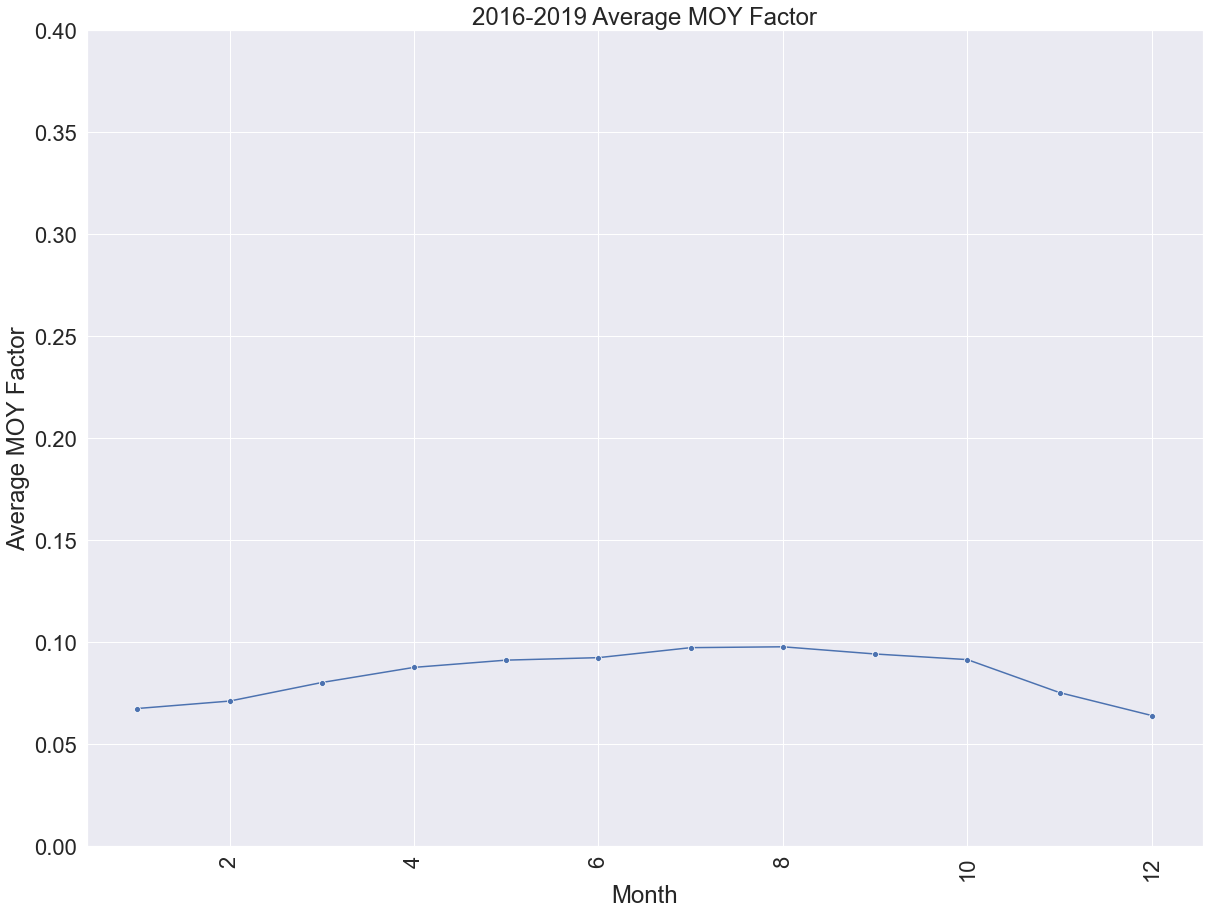

In [476]:
MOY_plot_ave(d1m_ave)

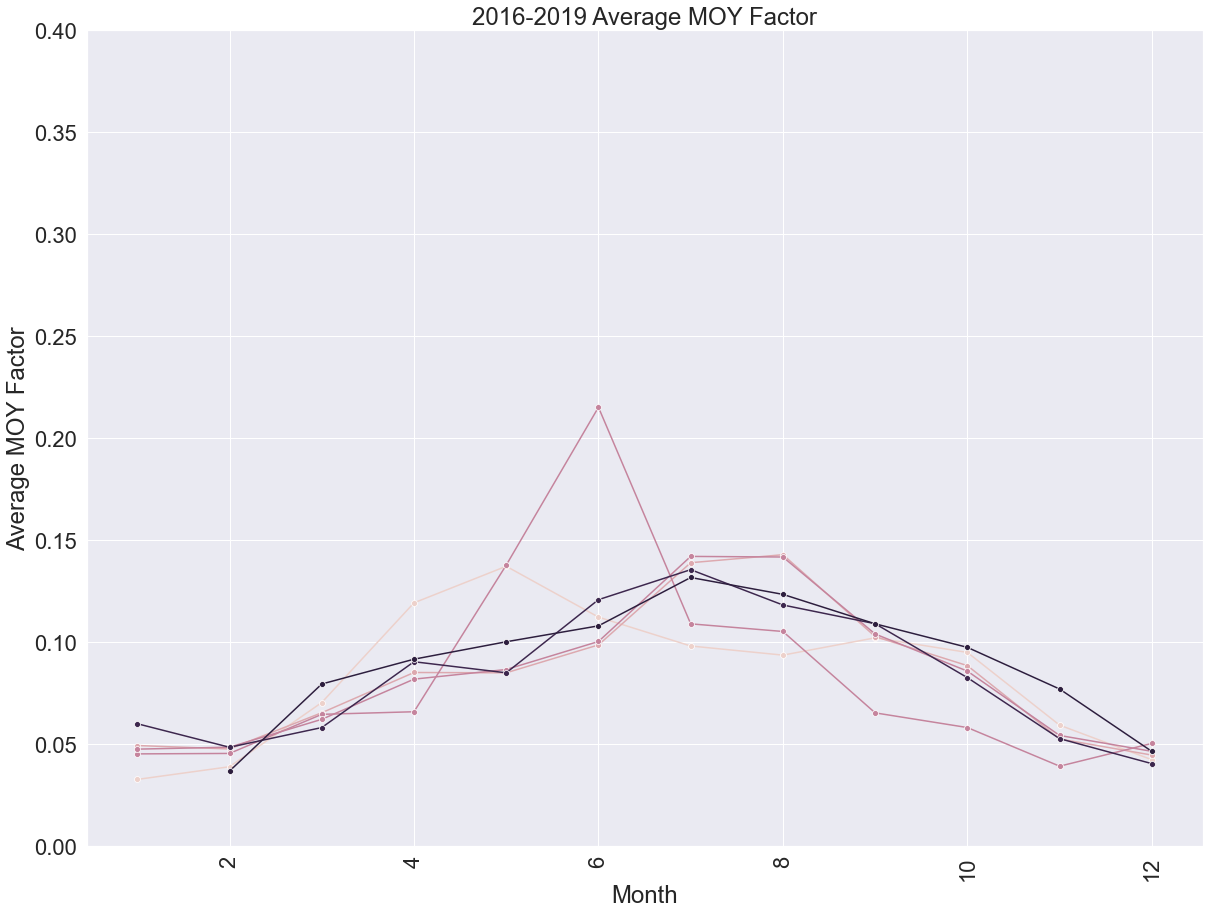

In [477]:
MOY_plot(d2m)

In [478]:
d2m_v1=d2m.drop_duplicates(subset=['ID'], keep='first')
d2m_v1.shape

(6, 5)

In [479]:
# check are these counter located
c=ind['ID'].isin(d2m_v1['ID'])
loc_id=ind[c]
loc_id_v1=loc_id.drop_duplicates(subset=['ID'], keep='first')
loc_id_v1

Unnamed: 0.1     ID  year   Max_WWI  Average_WWI  Weekday_Aergage_AMI  \
251           251  13426  2016  0.806250     0.400925             0.904439   
299           299  18375  2016  4.021394     0.656088             0.350185   
470           470  23305  2016  1.045093     0.584890             0.053002   
474           474  23307  2016  1.168662     0.556143             0.533455   
538           538  39406  2017  2.017544     0.845864             0.432205   
541           541  41347  2019  0.914634     0.403011             1.007726   

     Weekend_Aergage_AMI  Average AMI_wday_wend  Max_weekend_AMI  \
251             1.320427               0.684959         1.616379   
299             0.128274               2.729972         0.145084   
470             0.038550               1.374881         0.038811   
474             0.120695               4.419873         0.127495   
538             0.247571               1.745778         0.298611   
541             0.140230               7.186236         0.220238   

     Max_weekday_AMI  ...       state        country  Unnamed: 0      edgeUID  \
251         1.238683  ...  California  United States          88  306403872.0   
299         0.413402  ...  California  United States         102  308775307.0   
470         0.063527  ...  California  United States         153  308773840.0   
474         0.637576  ...  California  United States         154  308775682.0   
538         0.538462  ...  California  United States         194  309785840.0   
541         1.628635  ...  California  United States         226  307111306.0   

           osmId  stv_total  stv_com_total stv_rec_total  stv_com_ratio  \
251   13324467.0        NaN            NaN           NaN            NaN   
299  911701772.0        NaN            NaN           NaN            NaN   
470   25319425.0        NaN            NaN           NaN            NaN   
474   90094023.0        NaN            NaN           NaN            NaN   
538  308320044.0        NaN            NaN           NaN            NaN   
541  372527802.0      415.0           60.0         355.0       0.144578   

    stv_rec_ratio  
251           NaN  
299           NaN  
470           NaN  
474           NaN  
538           NaN  
541      0.855422  

[6 rows x 40 columns]

In [480]:
loc_id_v1.to_csv('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/MOY_factorseasonality2_5c.csv')

In [481]:
loc_id_v1.groupby(['county'])['county'].count()

county
Alameda County     1
Humboldt County    1
Orange County      1
Name: county, dtype: int64

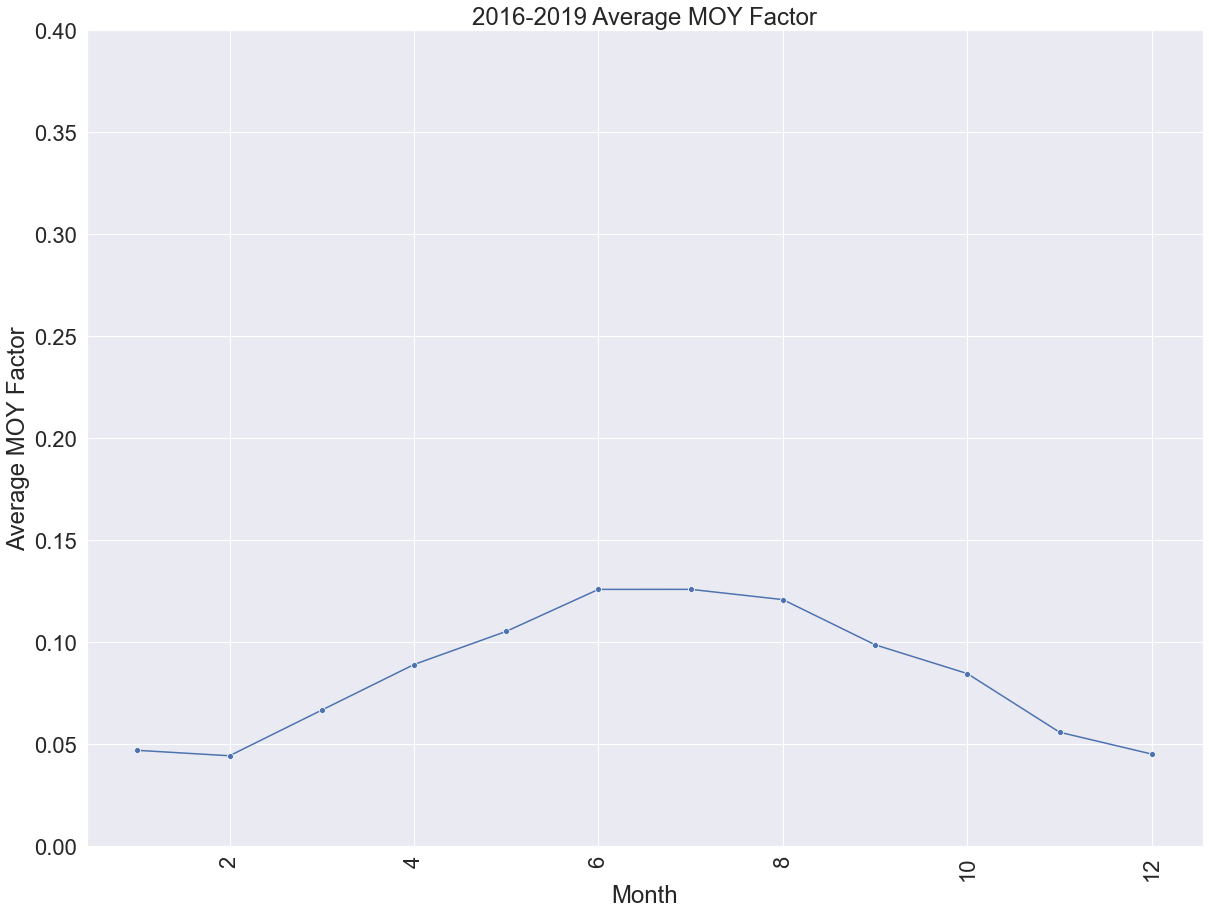

In [482]:
MOY_plot_ave(d2m_ave)

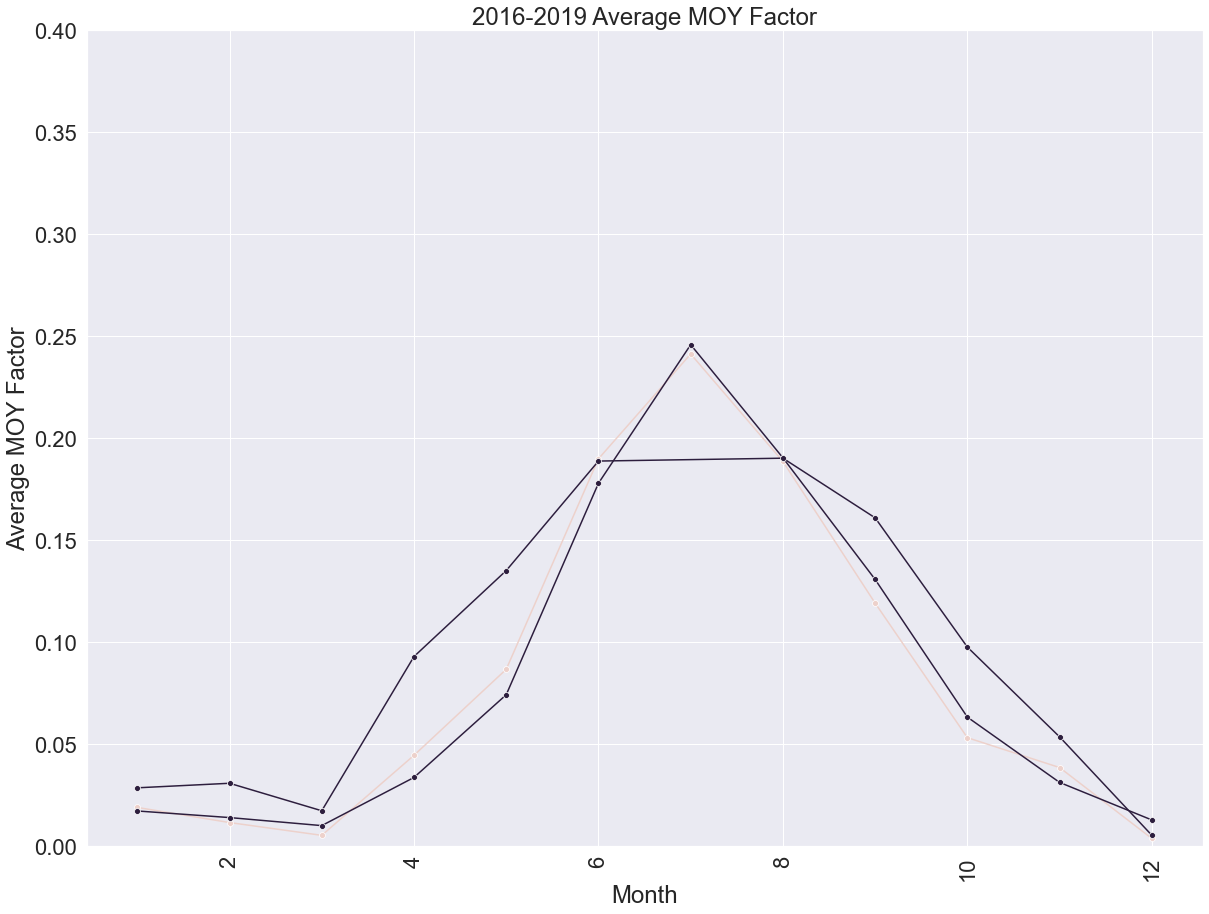

In [483]:
MOY_plot(d3m)

In [484]:
d3m['ID'].nunique()

3

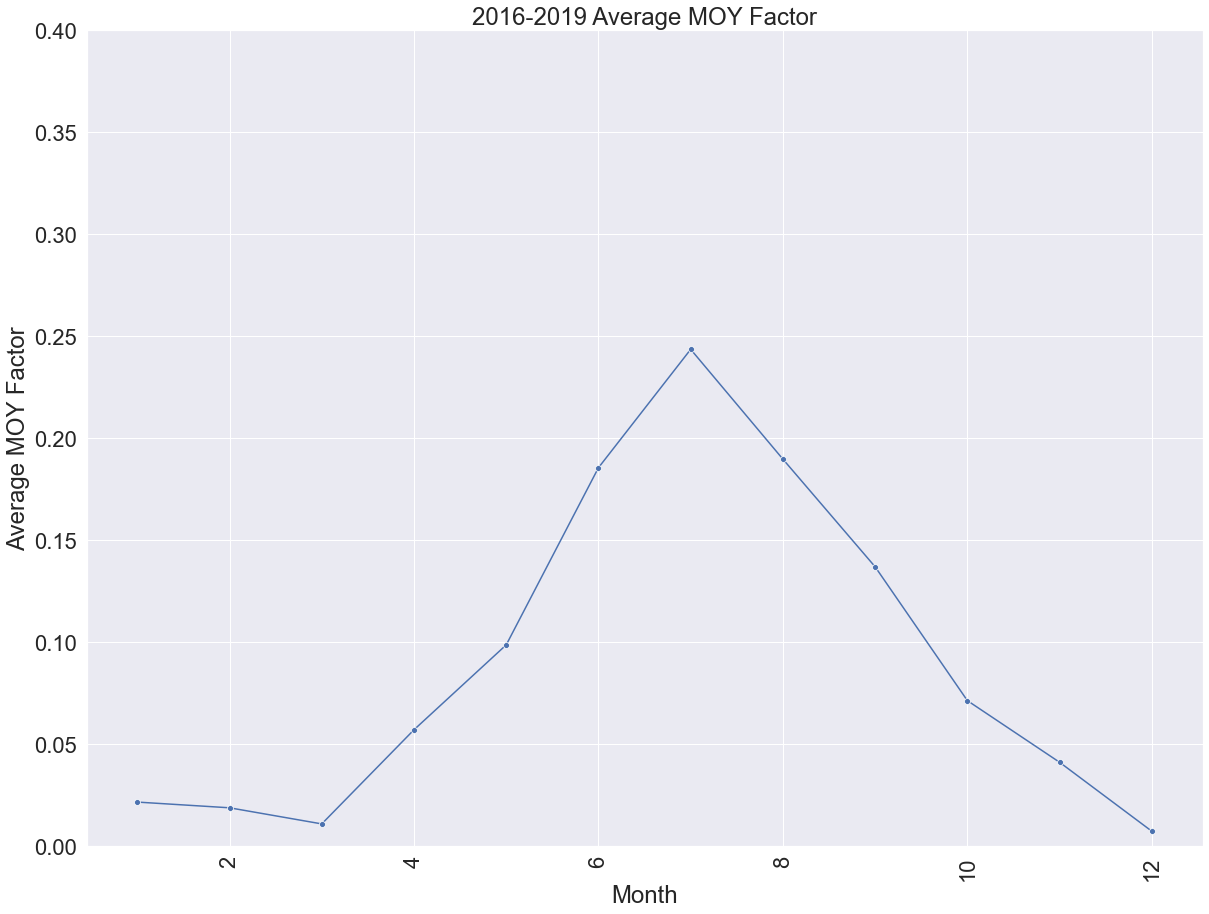

In [485]:
MOY_plot_ave(d3m_ave)

In [486]:
# export final MOY Factor by seasonality
d1m_ave['Criteria']='seasonal_factor<=2.4'
d2m_ave['Criteria']='2.4<seasonal_factor<=5'
d3m_ave['Criteria']='seasonal_factor>5'
final_MOY=pd.concat([d1m_ave,d2m_ave,d3m_ave],axis=0)
final_MOY.to_csv('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Final Factor/Final_MOY_Factor.csv')

# End of the Code